## **Automatic detection and classification of cardiac abnormalities**

-------

Author: María Sauras Fernández

mail: mariasauras.ml@gmail.com

Version: 2.0

Task: IDOVEN-Data Science 

------



In [360]:
# ------ Required libraries --------#

# Pandas  and numpy for Data Loading and Exploration

# Matplotlib, Seaborn for Data Visualization

#-----------------------------------#
#   Libraries for data processing   #

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pylab import rcParams


#-----------------------------------#
#         Libraries for ML          #

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


#### **STEP 0** Download data 

*(Only run this cell if you do not have the data downloaded)*

In [ ]:
wget -r -N -c -np https://physionet.org/files/ptb-xl/1.0.2/

#### **STEP 1.** DATA EXPLORATION

Given the data we can see that there is more than one dataset with cardiogram information, so we will use a generic function to load all the datasets without the need to duplicate code.

In [2]:
def load_heartddbb(path):
    data = pd.read_csv(path)
    return data

In [3]:
# In this line you can change the path to your path.
ptbxl_ddb = load_heartddbb('/Users/ledito/Downloads/Idoven-Data-Scientist-main/data/physionet.org/files/ptb-xl/1.0.2/ptbxl_database.csv')

ptbxl_ddb

ecg_id  patient_id    age  sex  height  weight  nurse  site  \
0           1     15709.0   56.0    1     NaN    63.0    2.0   0.0   
1           2     13243.0   19.0    0     NaN    70.0    2.0   0.0   
2           3     20372.0   37.0    1     NaN    69.0    2.0   0.0   
3           4     17014.0   24.0    0     NaN    82.0    2.0   0.0   
4           5     17448.0   19.0    1     NaN    70.0    2.0   0.0   
...       ...         ...    ...  ...     ...     ...    ...   ...   
21796   21833     17180.0   67.0    1     NaN     NaN    1.0   2.0   
21797   21834     20703.0  300.0    0     NaN     NaN    1.0   2.0   
21798   21835     19311.0   59.0    1     NaN     NaN    1.0   2.0   
21799   21836      8873.0   64.0    1     NaN     NaN    1.0   2.0   
21800   21837     11744.0   68.0    0     NaN     NaN    1.0   2.0   

           device       recording_date  ... SLI-LVH QRS-CLBB ST-ELEV-MI  \
0       CS-12   E  1984-11-09 09:17:34  ...   False    False      False   
1       CS-12   E  1984-11-14 12:55:37  ...    True    False      False   
2       CS-12   E  1984-11-15 12:49:10  ...   False    False      False   
3       CS-12   E  1984-11-15 13:44:57  ...   False    False      False   
4       CS-12   E  1984-11-17 10:43:15  ...   False    False      False   
...           ...                  ...  ...     ...      ...        ...   
21796  AT-60    3  2001-05-31 09:14:35  ...   False    False      False   
21797  AT-60    3  2001-06-05 11:33:39  ...   False    False      False   
21798  AT-60    3  2001-06-08 10:30:27  ...   False    False      False   
21799  AT-60    3  2001-06-09 18:21:49  ...   False    False      False   
21800  AT-60    3  2001-06-11 16:43:01  ...   False    False      False   

      ST-DEPR-MI  Q-ISC  Q-ISC-QPeak  Q-ISC-V2V3  Q-ISC-RPeak  STRAIN MI-ALL  
0          False  False        False       False        False   False  False  
1          False  False        False       False        False   False  False  
2          False  False        False       False        False   False  False  
3          False  False        False       False        False   False  False  
4          False  False        False       False        False   False  False  
...          ...    ...          ...         ...          ...     ...    ...  
21796       True  False        False       False        False   False   True  
21797      False  False        False       False        False   False  False  
21798      False  False        False       False        False   False  False  
21799      False  False        False       False        False   False  False  
21800      False  False        False       False        False   False  False  

[21801 rows x 44 columns]

In [4]:
# As not all columns are visible, we will show them with the following command:
ptbxl_ddb.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL'],
      dtype='object')

In [5]:
# To find out what information is contained in the columns that are not displayed: 
ptbxl_ddb['report']

0                   sinusrhythmus periphere niederspannung
1                      sinusbradykardie sonst normales ekg
2                               sinusrhythmus normales ekg
3                               sinusrhythmus normales ekg
4                               sinusrhythmus normales ekg
                               ...                        
21796    ventrikulÄre extrasystole(n) sinustachykardie ...
21797    sinusrhythmus lagetyp normal qrs(t) abnorm    ...
21798    sinusrhythmus lagetyp normal t abnorm in anter...
21799    supraventrikulÄre extrasystole(n) sinusrhythmu...
21800    sinusrhythmus p-sinistrocardiale lagetyp norma...
Name: report, Length: 21801, dtype: object

In [6]:
# To find out what information is contained in the columns that are not displayed: 
ptbxl_ddb['scp_codes']

0                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
1                             {'NORM': 80.0, 'SBRAD': 0.0}
2                               {'NORM': 100.0, 'SR': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21796    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21797             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21798                           {'ISCAS': 50.0, 'SR': 0.0}
21799                           {'NORM': 100.0, 'SR': 0.0}
21800                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21801, dtype: object

In [7]:
ptbxl_ddb['infarction_stadium2']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21796    NaN
21797    NaN
21798    NaN
21799    NaN
21800    NaN
Name: infarction_stadium2, Length: 21801, dtype: object

In [8]:
ptbxl_ddb['infarction_stadium1']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
21796               NaN
21797    Stadium II-III
21798               NaN
21799               NaN
21800               NaN
Name: infarction_stadium1, Length: 21801, dtype: object

In [9]:
ptbxl_ddb['electrodes_problems']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21796    NaN
21797    NaN
21798    NaN
21799    NaN
21800    NaN
Name: electrodes_problems, Length: 21801, dtype: object

In [10]:
ptbxl_ddb['extra_beats']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
21796     1ES
21797     NaN
21798     NaN
21799    SVES
21800     NaN
Name: extra_beats, Length: 21801, dtype: object

In [11]:
ptbxl_ddb['pacemaker']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
21796    NaN
21797    NaN
21798    NaN
21799    NaN
21800    NaN
Name: pacemaker, Length: 21801, dtype: object

As we can see, the 'infaction_stadium1 & 2', 'electrode_problems', 'extra_beats' and 'pacemaker' columns will not help us much in the study since there is not enough data.

In [12]:
# We convert float data into integers for the future analysis
ptbxl_ddb['age'] = ptbxl_ddb['age'].astype(int)

***PTBXL_DATABASE EXPLORATION***

As we showed with the previous commands, the dataset contains information about the patient: Age, sex, weight and height (although these last two are not found in all patients) and the follow-up of the heart function: infarction, problems encountered, etc.

In addition, in the database we also find whether the results obtained have been validated by a human.

-------



In [13]:
# In this line you can change the path to your path.
scp_stats = load_heartddbb('/Users/ledito/Downloads/Idoven-Data-Scientist-main/data/physionet.org/files/ptb-xl/1.0.2/scp_statements.csv')
scp_stats.head(4)

Unnamed: 0                     description  diagnostic  form  rhythm  \
0        NDT  non-diagnostic T abnormalities         1.0   1.0     NaN   
1       NST_         non-specific ST changes         1.0   1.0     NaN   
2        DIG                digitalis-effect         1.0   1.0     NaN   
3      LNGQT                long QT-interval         1.0   1.0     NaN   

  diagnostic_class diagnostic_subclass  \
0             STTC                STTC   
1             STTC                NST_   
2             STTC                STTC   
3             STTC                STTC   

                                  Statement Category  \
0                  other ST-T descriptive statements   
1  Basic roots for coding ST-T changes and abnorm...   
2                  other ST-T descriptive statements   
3                  other ST-T descriptive statements   

    SCP-ECG Statement Description  AHA code            aECG REFID CDISC Code  \
0  non-diagnostic T abnormalities       NaN                   NaN        NaN   
1         non-specific ST changes     145.0  MDC_ECG_RHY_STHILOST        NaN   
2       suggests digitalis-effect     205.0                   NaN        NaN   
3                long QT-interval     148.0                   NaN        NaN   

  DICOM Code  
0        NaN  
1        NaN  
2        NaN  
3        NaN

***SCP_STATS database EXPLORATION***

This database contains information related to cardiac abnormalities

-----



#### **STEP 2.** *DATA PREPROCESSING & DATA ANALYSIS*

---------

In [262]:
#------------------------ DATA PREPROCESSING -----------------------------------------#

# We identify all the columns/rows with Nans values
def missingValues(df):
  missing_values = df.isnull() 
  sum_missing_values = missing_values.sum()
  return sum_missing_values

# We drop all the columns with Nans values
def deletingMValues(df): return df.dropna(axis=1,inplace=True)

# Function that combines the above functions for cleaner code 
def preprocess(df):
  e = missingValues(df)
  for i in range(len(e)):
        # there is empty data
        if e[i] != 0: 
          deletingMValues(df)
          break

#------------------------------------------------------
# We replace categorical data to numerical data
#     Input:
#         - df: our dataframe
#     Return:
#         - df without categorical data
#------------------------------------------------------
def dummies(df): return df.replace({False: 0, True: 1}, inplace=True)

# Removes redundant data from the dataframe
def drop_data(df,x): df.drop(x, axis=1, inplace=True)


In [15]:
class Data_analytics():
  def __init__(self, df):
    self.df = df

  ## Summary statistics
  def std(self):
    print(self.df.describe())

  ## We take the class we are interested in studying. 
  def dcrb(self,x):
    print(self.df.groupby(x).size())
  
  ## We will show from the list passed by parameter the values that appear more in the list
  # and those with the least
  def frequent(self, List):
    occurence_count = Counter(List)
    print('Most Frequent -->',occurence_count.most_common(1)[0][0])
    print('Less Frequent -->',min(occurence_count, key = occurence_count.get))

  ## We observe how the inputs are interrelated in pairs.
  ## Displays the relationship for(n, 2) combination of variables 
  ## in a DataFrame as a matrix of graphs and the diagonal graphs are the univariate graphs.
  def pair(self,x):
    sns.pairplot(self.df, hue=x)

  # Displays heatmap
  def heat_map(self):
    plt.figure(figsize=(16,9))
    corr_mx = self.df.corr() # correlation matrix
    sns.heatmap(corr_mx,cmap="coolwarm")

  # Correlations between all variables
  def correlation(self):
    correlationFeatures = self.df.corr()
    plt.figure(figsize=(15, 5))
    plot = sns.heatmap(correlationFeatures, annot=True)
    plt.title('Correlation study')
    return plot
  
  # Just in case if you want to look for a single correlation, between a pair of variables
  def individualhist(self, x):
    return self.df[x].hist(grid=True, figsize=(20,16),color='#0504aa', zorder=2, rwidth=0.9, bins='auto', alpha=0.7)
  
  
  # Histogram of every single variable
  def histogram(self):
    return self.df.hist(grid=True, figsize=(20,16), color='purple', zorder=2, rwidth=0.9, bins='auto')


  def countplot(self,x): return sns.countplot(self.df[x])
  
  # Function to add information to the plot
  def inform_plot(self,t,x,y):
    axes = plt.gca()
    plt.title(t, fontsize = 25)
    axes.set_xlabel(x,fontsize = 20)
    axes.set_ylabel(y,fontsize = 20)
 

##### 2.1 DATA PREPROCESSING
    - 1. We drop the columns with Nan Values because these columns don't contain much information. You can see these columns in step1.
    - 2. We drop redundant columns like patient_id, recording_date, etc because in possible predictions it will be data that will not be useful for us.

In [16]:
ptbxl_ddb.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL'],
      dtype='object')

In [17]:
# We drop columns with NaN values because it doesn't contains much information for a future predictions.
preprocess(ptbxl_ddb)

In [18]:
# Visualize our new dataset
ptbxl_ddb.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'device', 'recording_date',
       'report', 'scp_codes', 'second_opinion', 'initial_autogenerated_report',
       'validated_by_human', 'strat_fold', 'filename_lr', 'filename_hr',
       'r_peaks', 'RS-LVH', 'S12-LVH', 'R56-LVH', 'QRS-LVH', 'LI-LVH',
       'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI', 'ST-DEPR-MI', 'Q-ISC',
       'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak', 'STRAIN', 'MI-ALL'],
      dtype='object')

In [19]:
# We are going to drop the columns that will not contribute anything to the possible study or predictions
rv_cols = ['ecg_id', 'patient_id','device','recording_date','second_opinion','initial_autogenerated_report',
       'validated_by_human','strat_fold', 'filename_lr', 'filename_hr',]
for i in range(len(rv_cols)): drop_data(ptbxl_ddb,rv_cols[i])

In [20]:
ptbxl_ddb.head(1)

age  sex                                  report  \
0   56    1  sinusrhythmus periphere niederspannung   

                                  scp_codes  \
0  {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}   

                                         r_peaks  RS-LVH  S12-LVH  R56-LVH  \
0  [ 22 115 208 300 393 488 583 679 773 865 961]   False    False    False   

   QRS-LVH  LI-LVH  SLI-LVH  QRS-CLBB  ST-ELEV-MI  ST-DEPR-MI  Q-ISC  \
0    False   False    False     False       False       False  False   

   Q-ISC-QPeak  Q-ISC-V2V3  Q-ISC-RPeak  STRAIN  MI-ALL  
0        False       False        False   False   False

In [21]:
# To finish with the modification of the dataset, we are going to convert categorical data to numerical
# data. In our case, we convert False and True in 0 - 1
dummies(ptbxl_ddb)

ptbxl_ddb.head(4)

age  sex                                  report  \
0   56    1  sinusrhythmus periphere niederspannung   
1   19    0     sinusbradykardie sonst normales ekg   
2   37    1              sinusrhythmus normales ekg   
3   24    0              sinusrhythmus normales ekg   

                                  scp_codes  \
0  {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}   
1              {'NORM': 80.0, 'SBRAD': 0.0}   
2                {'NORM': 100.0, 'SR': 0.0}   
3                {'NORM': 100.0, 'SR': 0.0}   

                                             r_peaks  RS-LVH  S12-LVH  \
0      [ 22 115 208 300 393 488 583 679 773 865 961]       0        0   
1                      [101 231 368 502 627 747 863]       0        1   
2      [  7 104 202 298 394 485 577 670 764 857 951]       0        0   
3  [ 30 108 192 279 365 447 523 601 681 763 841 9...       0        0   

   R56-LVH  QRS-LVH  LI-LVH  SLI-LVH  QRS-CLBB  ST-ELEV-MI  ST-DEPR-MI  Q-ISC  \
0        0        0       0        0         0           0           0      0   
1        0        0       0        1         0           0           0      0   
2        0        0       0        0         0           0           0      0   
3        0        1       0        0         0           0           0      0   

   Q-ISC-QPeak  Q-ISC-V2V3  Q-ISC-RPeak  STRAIN  MI-ALL  
0            0           0            0       0       0  
1            0           0            0       0       0  
2            0           0            0       0       0  
3            0           0            0       0       0

##### 2.2 DATA ANALYSIS

In this point we analyze data in differents ways:

*1. General Data:* We analyze all dataset. We'll observe diferents plots to know the relationship between differents columns in the dataset, basic stadistics and histograms.

*2. Age study:* In this point, you can see basic stadistics about the age of the patients, the maximum and minimum age..

*3. Sex Study:* Same that age study.

*4. Cardiac study:* In this point we analyze cardiac abnormalities from differents approaches.



In [22]:
max = ptbxl_ddb['age'].max()
max

300

Investigating in the dataset we realize that there is an age that is probably an error, so it will be eliminated.

*Update:  This is not a mistake. This is because people over 89 are told they are 300 years old for privacy reasons.*

In [23]:
index = ptbxl_ddb['age'].index[ ptbxl_ddb['age'] == 300]

if len(index) > 0:
  ptbxl_ddb.drop(index, inplace=True)
  ptbxl_ddb.reset_index(level=None, drop=True, inplace=True)

In [24]:
max = ptbxl_ddb['age'].max()
max

89

**2.2.1 GENERAL DATA ANALYSYS**

In [25]:
da = Data_analytics(ptbxl_ddb)

In [26]:
da.std()

                age           sex        RS-LVH       S12-LVH       R56-LVH  \
count  21508.000000  21508.000000  21508.000000  21508.000000  21508.000000   
mean      59.538032      0.475172      0.019760      0.110889      0.018691   
std       16.758293      0.499395      0.139178      0.314002      0.135433   
min        2.000000      0.000000      0.000000      0.000000      0.000000   
25%       50.000000      0.000000      0.000000      0.000000      0.000000   
50%       61.000000      0.000000      0.000000      0.000000      0.000000   
75%       72.000000      1.000000      0.000000      0.000000      0.000000   
max       89.000000      1.000000      1.000000      1.000000      1.000000   

            QRS-LVH        LI-LVH       SLI-LVH      QRS-CLBB    ST-ELEV-MI  \
count  21508.000000  21508.000000  21508.000000  21508.000000  21508.000000   
mean       0.646457      0.155663      0.071276      0.097499      0.054584   
std        0.478080      0.362544      0.257291    

/var/folders/z8/52zfs8h97qj1h6xxcnn1r3mh0000gn/T/ipykernel_25603/757540299.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationFeatures = self.df.corr()


<AxesSubplot: title={'center': 'Correlation study'}>

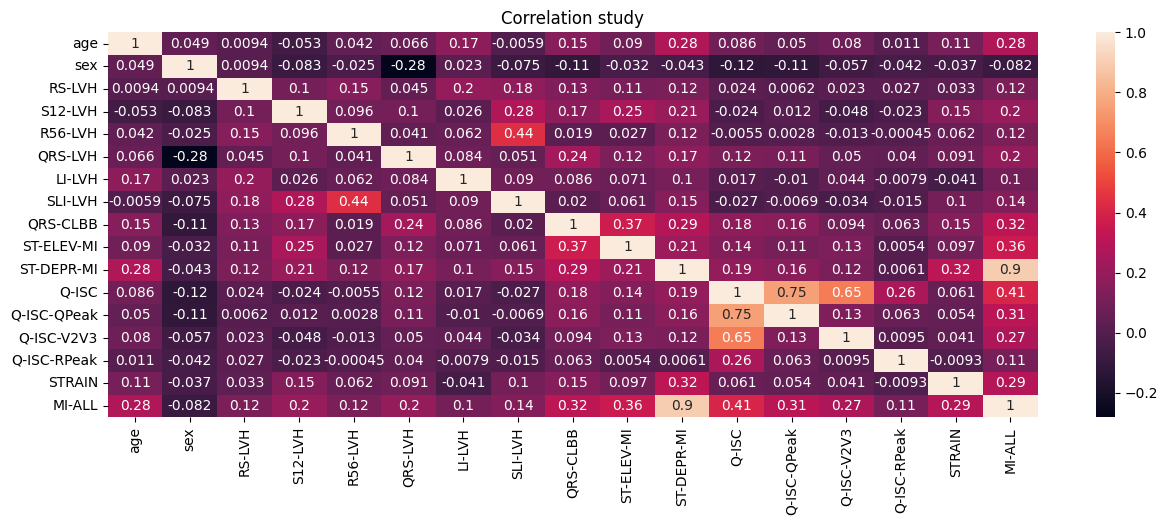

In [27]:
# Correlation plot
da.correlation()

As we can see in the correlation plot, there are several variables that have reciprocal relationships. 

These variables are:

    ST-DEPR-MI w/ MI-ALL

    Q-ISC w/ Q-ISC-V2V3

    Q-ISC w/ Q-ISC-Rpeak

A clrearly way of visualization of the relationship of these variables can be see in the plot below:

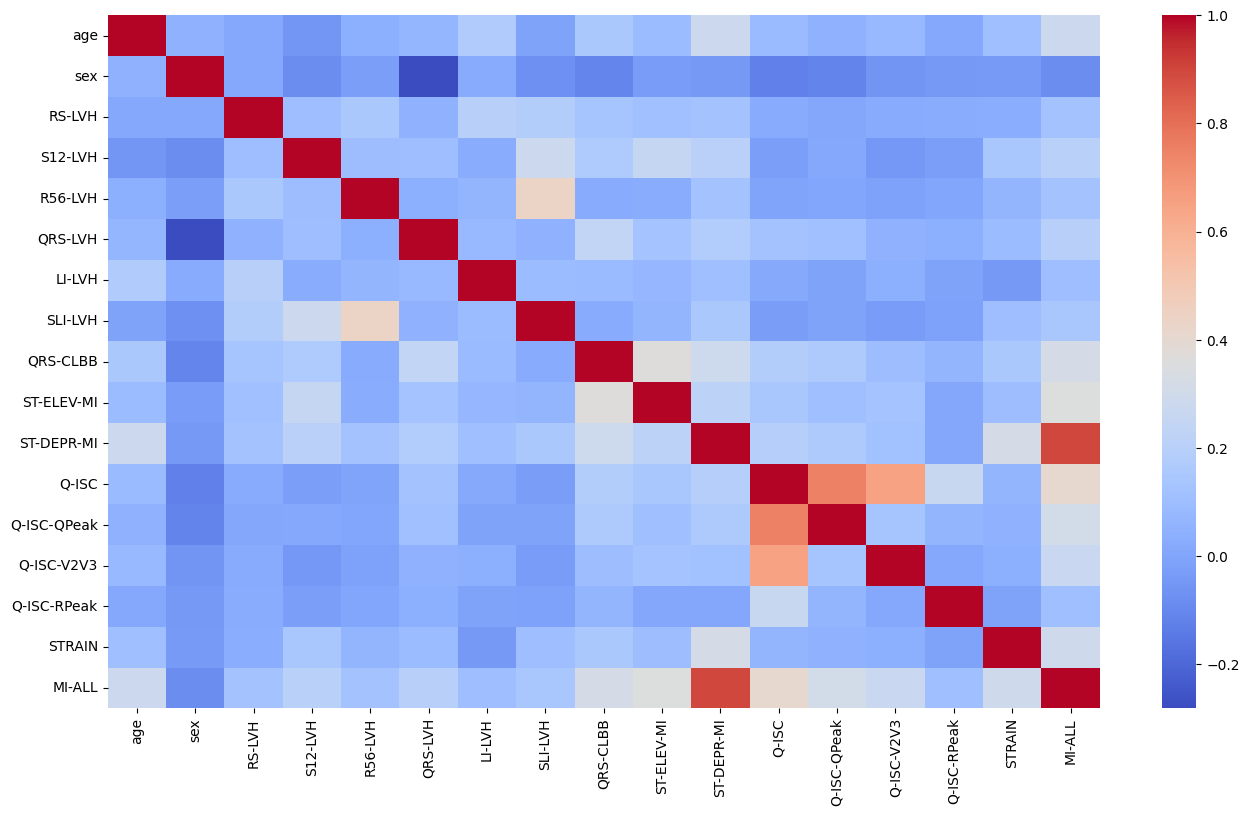

In [263]:
da.heat_map()

This plot show us the reciprocal relationship of these variables like a heat map. The variables with a strong relationship are read or orange while those don't have much relationship are blue.

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'RS-LVH'}>,
        <AxesSubplot: title={'center': 'S12-LVH'}>],
       [<AxesSubplot: title={'center': 'R56-LVH'}>,
        <AxesSubplot: title={'center': 'QRS-LVH'}>,
        <AxesSubplot: title={'center': 'LI-LVH'}>,
        <AxesSubplot: title={'center': 'SLI-LVH'}>],
       [<AxesSubplot: title={'center': 'QRS-CLBB'}>,
        <AxesSubplot: title={'center': 'ST-ELEV-MI'}>,
        <AxesSubplot: title={'center': 'ST-DEPR-MI'}>,
        <AxesSubplot: title={'center': 'Q-ISC'}>],
       [<AxesSubplot: title={'center': 'Q-ISC-QPeak'}>,
        <AxesSubplot: title={'center': 'Q-ISC-V2V3'}>,
        <AxesSubplot: title={'center': 'Q-ISC-RPeak'}>,
        <AxesSubplot: title={'center': 'STRAIN'}>],
       [<AxesSubplot: title={'center': 'MI-ALL'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

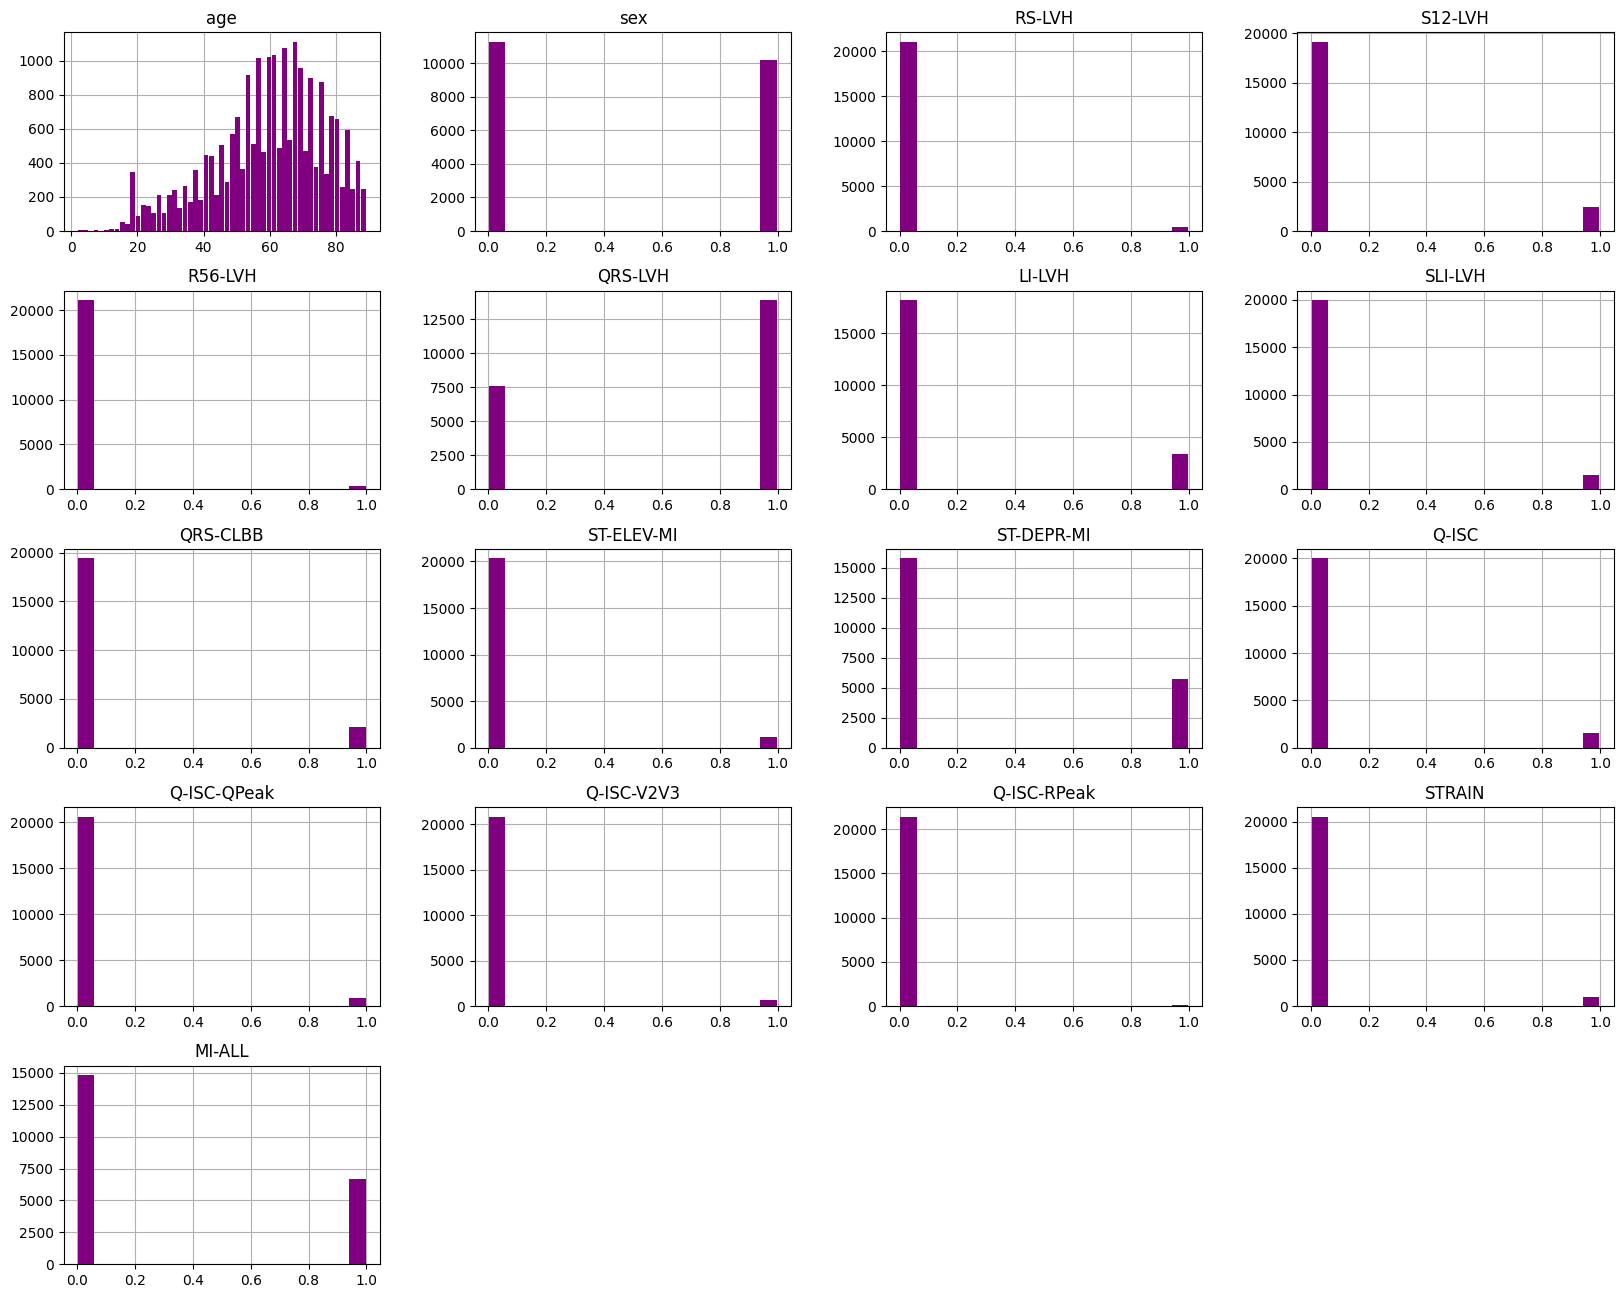

In [28]:
da.histogram()

After plotting the data shown in the graph, several conclusions can be drawn: 

1. Regarding the sex, we see that there are more in class 0 than in class 1. This will be defined later to know which class belongs to women and which to men.

2. In the study there is a wide range of ages.

3. Regarding the ECG signals, it is evident that there are many patients with positive in: QRS-LVH while the one with the fewest positives is Q-ISC-RPeak.

------

**2.2.2 AGE STUDY**

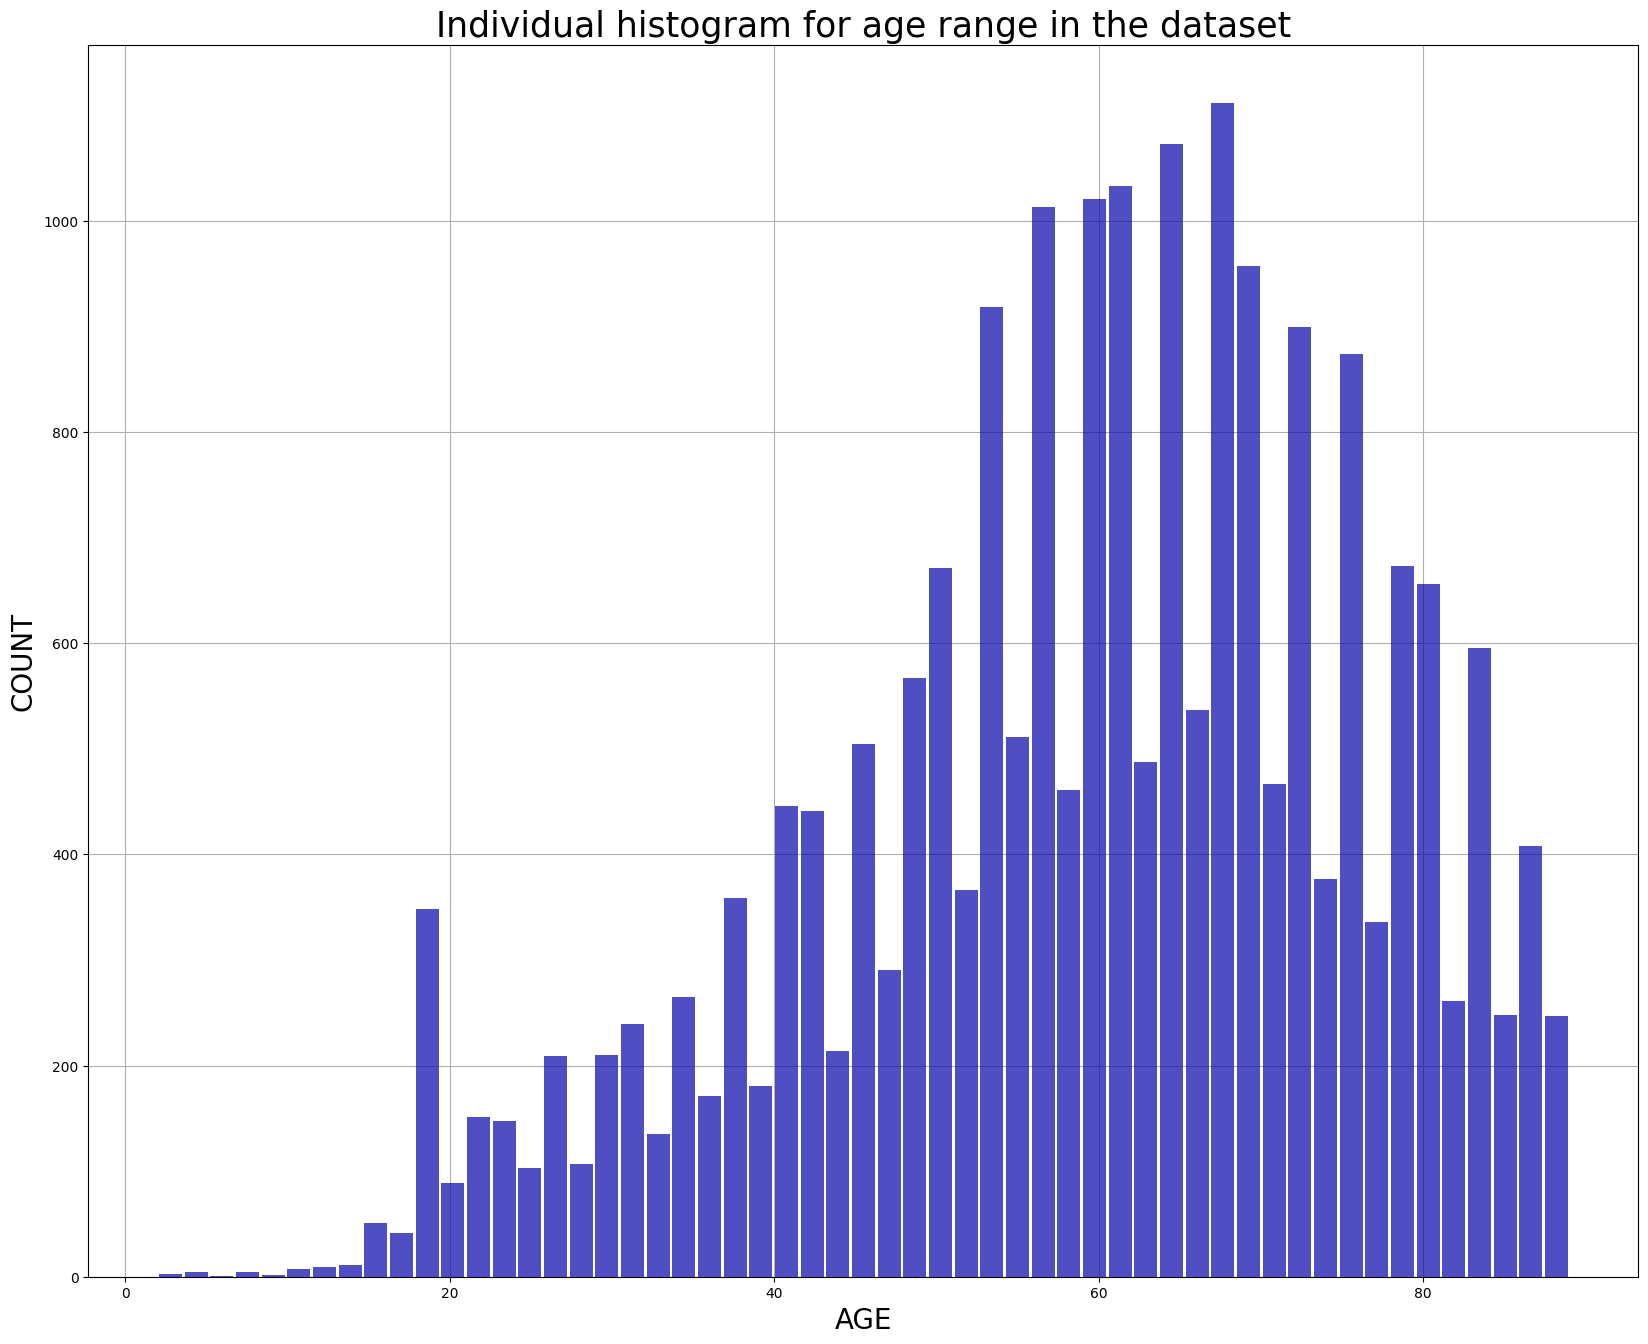

In [30]:
da.individualhist('age')
da.inform_plot('Individual histogram for age range in the dataset','AGE','COUNT')

In [31]:
ages = ptbxl_ddb['age']
print('Lowest age in the dataset:      ',ages.min())
print('Higest age in the dataset:      ',ages.max())
print('Patients with most common and less common age: ')
da.frequent(ages)

print('\n------------\n')

print('BASIC STATISTICS: ')

print("Mean: {}".format(ptbxl_ddb['age'].mean()))
print("Median: {}".format(ptbxl_ddb['age'].median()))
print("Mode: {}".format(ptbxl_ddb['age'].mode()))

Lowest age in the dataset:       2
Higest age in the dataset:       89
Patients with most common and less common age: 
Most Frequent --> 67
Less Frequent --> 2

------------

BASIC STATISTICS: 
Mean: 59.53803236005207
Median: 61.0
Mode: 0    67
Name: age, dtype: int64


**Conclusions:**

1. The smallest patients are 2 years old while the largest (modifying the dataset) are 89.
2. The most recurrent age are patients with 67 years while the least frequent are the youngest, 2 years.
3. The average age of the patients is 60 year

-------

**2.2.3 SEX STUDY**

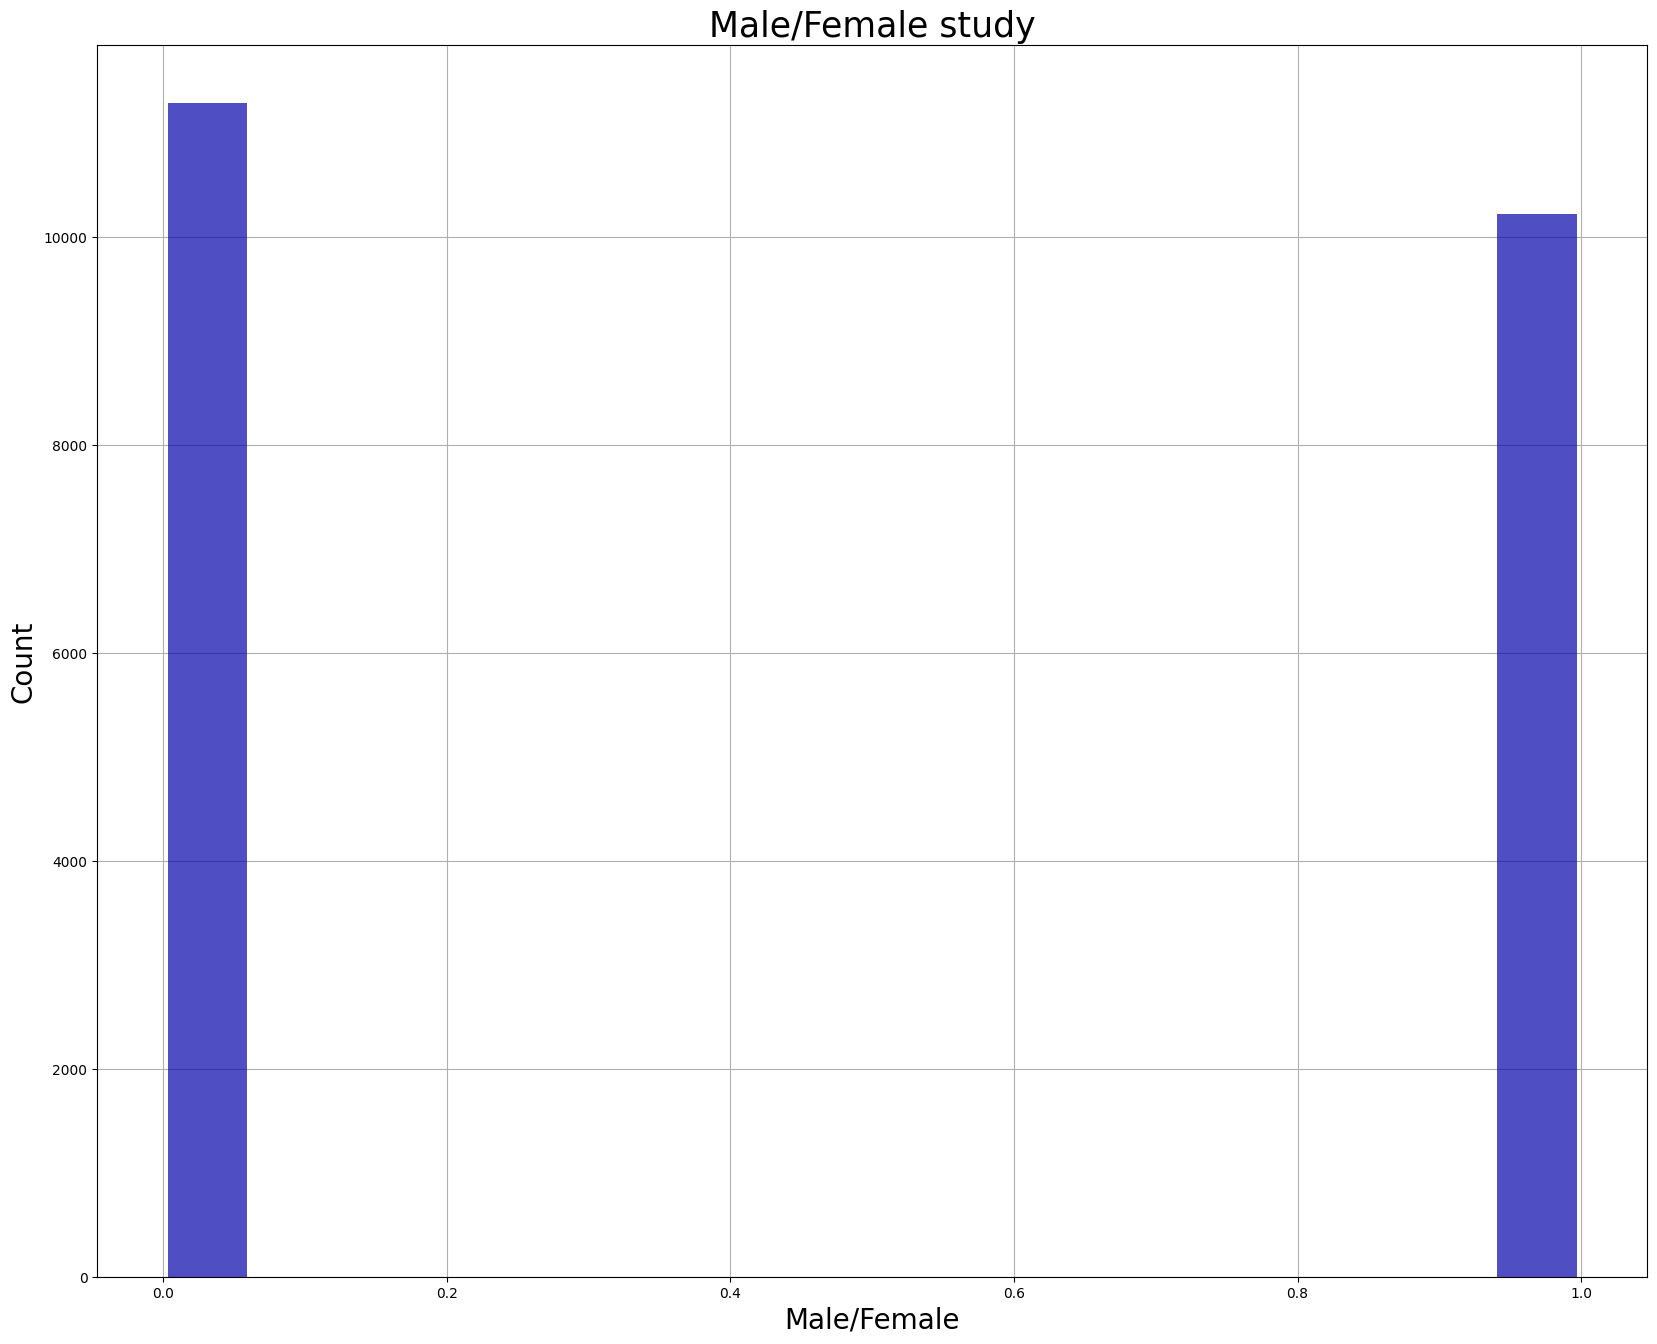

In [32]:
da.individualhist('sex')
da.inform_plot('Male/Female study','Male/Female','Count')


In [33]:
p = ptbxl_ddb['sex'].value_counts()
l = len(ptbxl_ddb['sex'])
print('Count of male/female:')
print(p)

print('------------')

c1 = p[0]/l
c2 = p[1]/l
print('"%" of Male --> ',c1*100,' "%" of Female  --> ',c2*100)

Count of male/female:
0    11288
1    10220
Name: sex, dtype: int64
------------
"%" of Male -->  52.482797098753956  "%" of Female  -->  47.517202901246044


As we are told in the "README", there is a higher percentage of men than women. 

So according to the results:

**Male = 0** && **Female = 1**

-----

**2.2.4 CARDIAC ABNORMALITIES STUDY**

We separated data for this study

In [34]:
ptbxl_ddb.columns

Index(['age', 'sex', 'report', 'scp_codes', 'r_peaks', 'RS-LVH', 'S12-LVH',
       'R56-LVH', 'QRS-LVH', 'LI-LVH', 'SLI-LVH', 'QRS-CLBB', 'ST-ELEV-MI',
       'ST-DEPR-MI', 'Q-ISC', 'Q-ISC-QPeak', 'Q-ISC-V2V3', 'Q-ISC-RPeak',
       'STRAIN', 'MI-ALL'],
      dtype='object')

In [35]:
r_peaks = ptbxl_ddb['r_peaks']
scp     = ptbxl_ddb['scp_codes']
report  = ptbxl_ddb['report']

In [36]:
print('             The peaks on an electrocardiogram')
r_peaks

             The peaks on an electrocardiogram


0            [ 22 115 208 300 393 488 583 679 773 865 961]
1                            [101 231 368 502 627 747 863]
2            [  7 104 202 298 394 485 577 670 764 857 951]
3        [ 30 108 192 279 365 447 523 601 681 763 841 9...
4            [ 33 123 219 313 399 482 571 669 764 854 938]
                               ...                        
21503    [ 36 102 168 233 299 365 430 496 562 627 693 7...
21504    [ 22  79 135 190 245 301 357 413 468 523 579 6...
21505                [ 76 175 274 383 491 591 688 791 894]
21506    [ 23 110 199 286 373 458 540 599 703 792 881 967]
21507            [ 68 169 269 369 470 572 674 776 877 980]
Name: r_peaks, Length: 21508, dtype: object

In [37]:
print('                         ECG data ')
scp

                         ECG data 


0                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
1                             {'NORM': 80.0, 'SBRAD': 0.0}
2                               {'NORM': 100.0, 'SR': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21503            {'LAFB': 100.0, 'IVCD': 100.0, 'SR': 0.0}
21504    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21505                           {'ISCAS': 50.0, 'SR': 0.0}
21506                           {'NORM': 100.0, 'SR': 0.0}
21507                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21508, dtype: object

1. REPORT

In [38]:
report.head(4)
print('Most and less frecuent Report:')
da.frequent(report)

Most and less frecuent Report:
Most Frequent --> sinus rhythm. normal ecg.
Less Frequent --> sinusrhythmus linkstyp t abnormal, wahrscheinlich    inferiorer myokardschaden qt-verlÄngerung


The most frecuent report is the normal rhythm of the heart.

And the less frecuent report is a cardiac abnormality --> likely inferior myocardial damage qt prolongation

**Analysis about most and less report:**

In [224]:
# Most common report

most_common_report = ptbxl_ddb[ptbxl_ddb['report']=='sinus rhythm. normal ecg.']


In [226]:
most_common_report.head()

age  sex                     report                   scp_codes  \
245   63    0  sinus rhythm. normal ecg.  {'NORM': 100.0, 'SR': 0.0}   
251   61    1  sinus rhythm. normal ecg.  {'NORM': 100.0, 'SR': 0.0}   
253   66    1  sinus rhythm. normal ecg.  {'NORM': 100.0, 'SR': 0.0}   
261   54    0  sinus rhythm. normal ecg.  {'NORM': 100.0, 'SR': 0.0}   
264   67    1  sinus rhythm. normal ecg.  {'NORM': 100.0, 'SR': 0.0}   

                                               r_peaks  RS-LVH  S12-LVH  \
245      [ 12 109 207 307 407 503 601 699 795 890 987]       0        0   
251          [ 73 173 269 368 466 561 658 756 849 945]       0        0   
253          [ 24 122 224 327 432 539 647 756 863 972]       0        0   
261      [ 20 111 202 295 389 485 578 672 767 862 956]       0        0   
264  [ 12  78 145 211 278 346 414 483 552 620 687 7...       0        0   

     R56-LVH  QRS-LVH  LI-LVH  SLI-LVH  QRS-CLBB  ST-ELEV-MI  ST-DEPR-MI  \
245        0        0       1        0         0           0           0   
251        0        1       0        0         0           0           0   
253        0        1       1        0         0           0           0   
261        0        0       0        0         0           0           0   
264        0        0       0        0         0           0           0   

     Q-ISC  Q-ISC-QPeak  Q-ISC-V2V3  Q-ISC-RPeak  STRAIN  MI-ALL  
245      0            0           0            0       0       0  
251      0            0           0            0       0       0  
253      0            0           0            0       0       0  
261      0            0           0            0       0       0  
264      0            0           0            0       0       0

In [230]:
print('Males with the most common report: ',most_common_report.apply(lambda x: x['sex'] == 0, axis=1).sum())

Males with the most common report:  719


In [229]:
print('Females with the most common report: ',most_common_report.apply(lambda x: x['sex'] == 1, axis=1).sum())

Females with the most common report:  1010


In [222]:
# Less common report

ptbxl_ddb[ptbxl_ddb['report']=='sinusrhythmus linkstyp t abnormal, wahrscheinlich    inferiorer myokardschaden qt-verlÄngerung'].head()

age  sex                                             report  \
6   54    0  sinusrhythmus linkstyp t abnormal, wahrscheinl...   

                    scp_codes                                    r_peaks  \
6  {'NORM': 100.0, 'SR': 0.0}  [ 40 136 235 330 427 526 621 718 816 911]   

   RS-LVH  S12-LVH  R56-LVH  QRS-LVH  LI-LVH  SLI-LVH  QRS-CLBB  ST-ELEV-MI  \
6       0        0        0        1       1        0         0           0   

   ST-DEPR-MI  Q-ISC  Q-ISC-QPeak  Q-ISC-V2V3  Q-ISC-RPeak  STRAIN  MI-ALL  
6           0      0            0           0            0       0       0

As we can see, there is only one patient with this diagnosis, and it is clear that he is a man. In addition, it is positive in:

QRS-Left Ventricular Hypertrophy(LVH) && LI-Left Ventricular Hypertrophy(LVH)

And r-peaks: [ 40 136 235 330 427 526 621 718 816 911]

Question: What could be the causes?

**PLOTTING REPORT DATASET**

<AxesSubplot: >

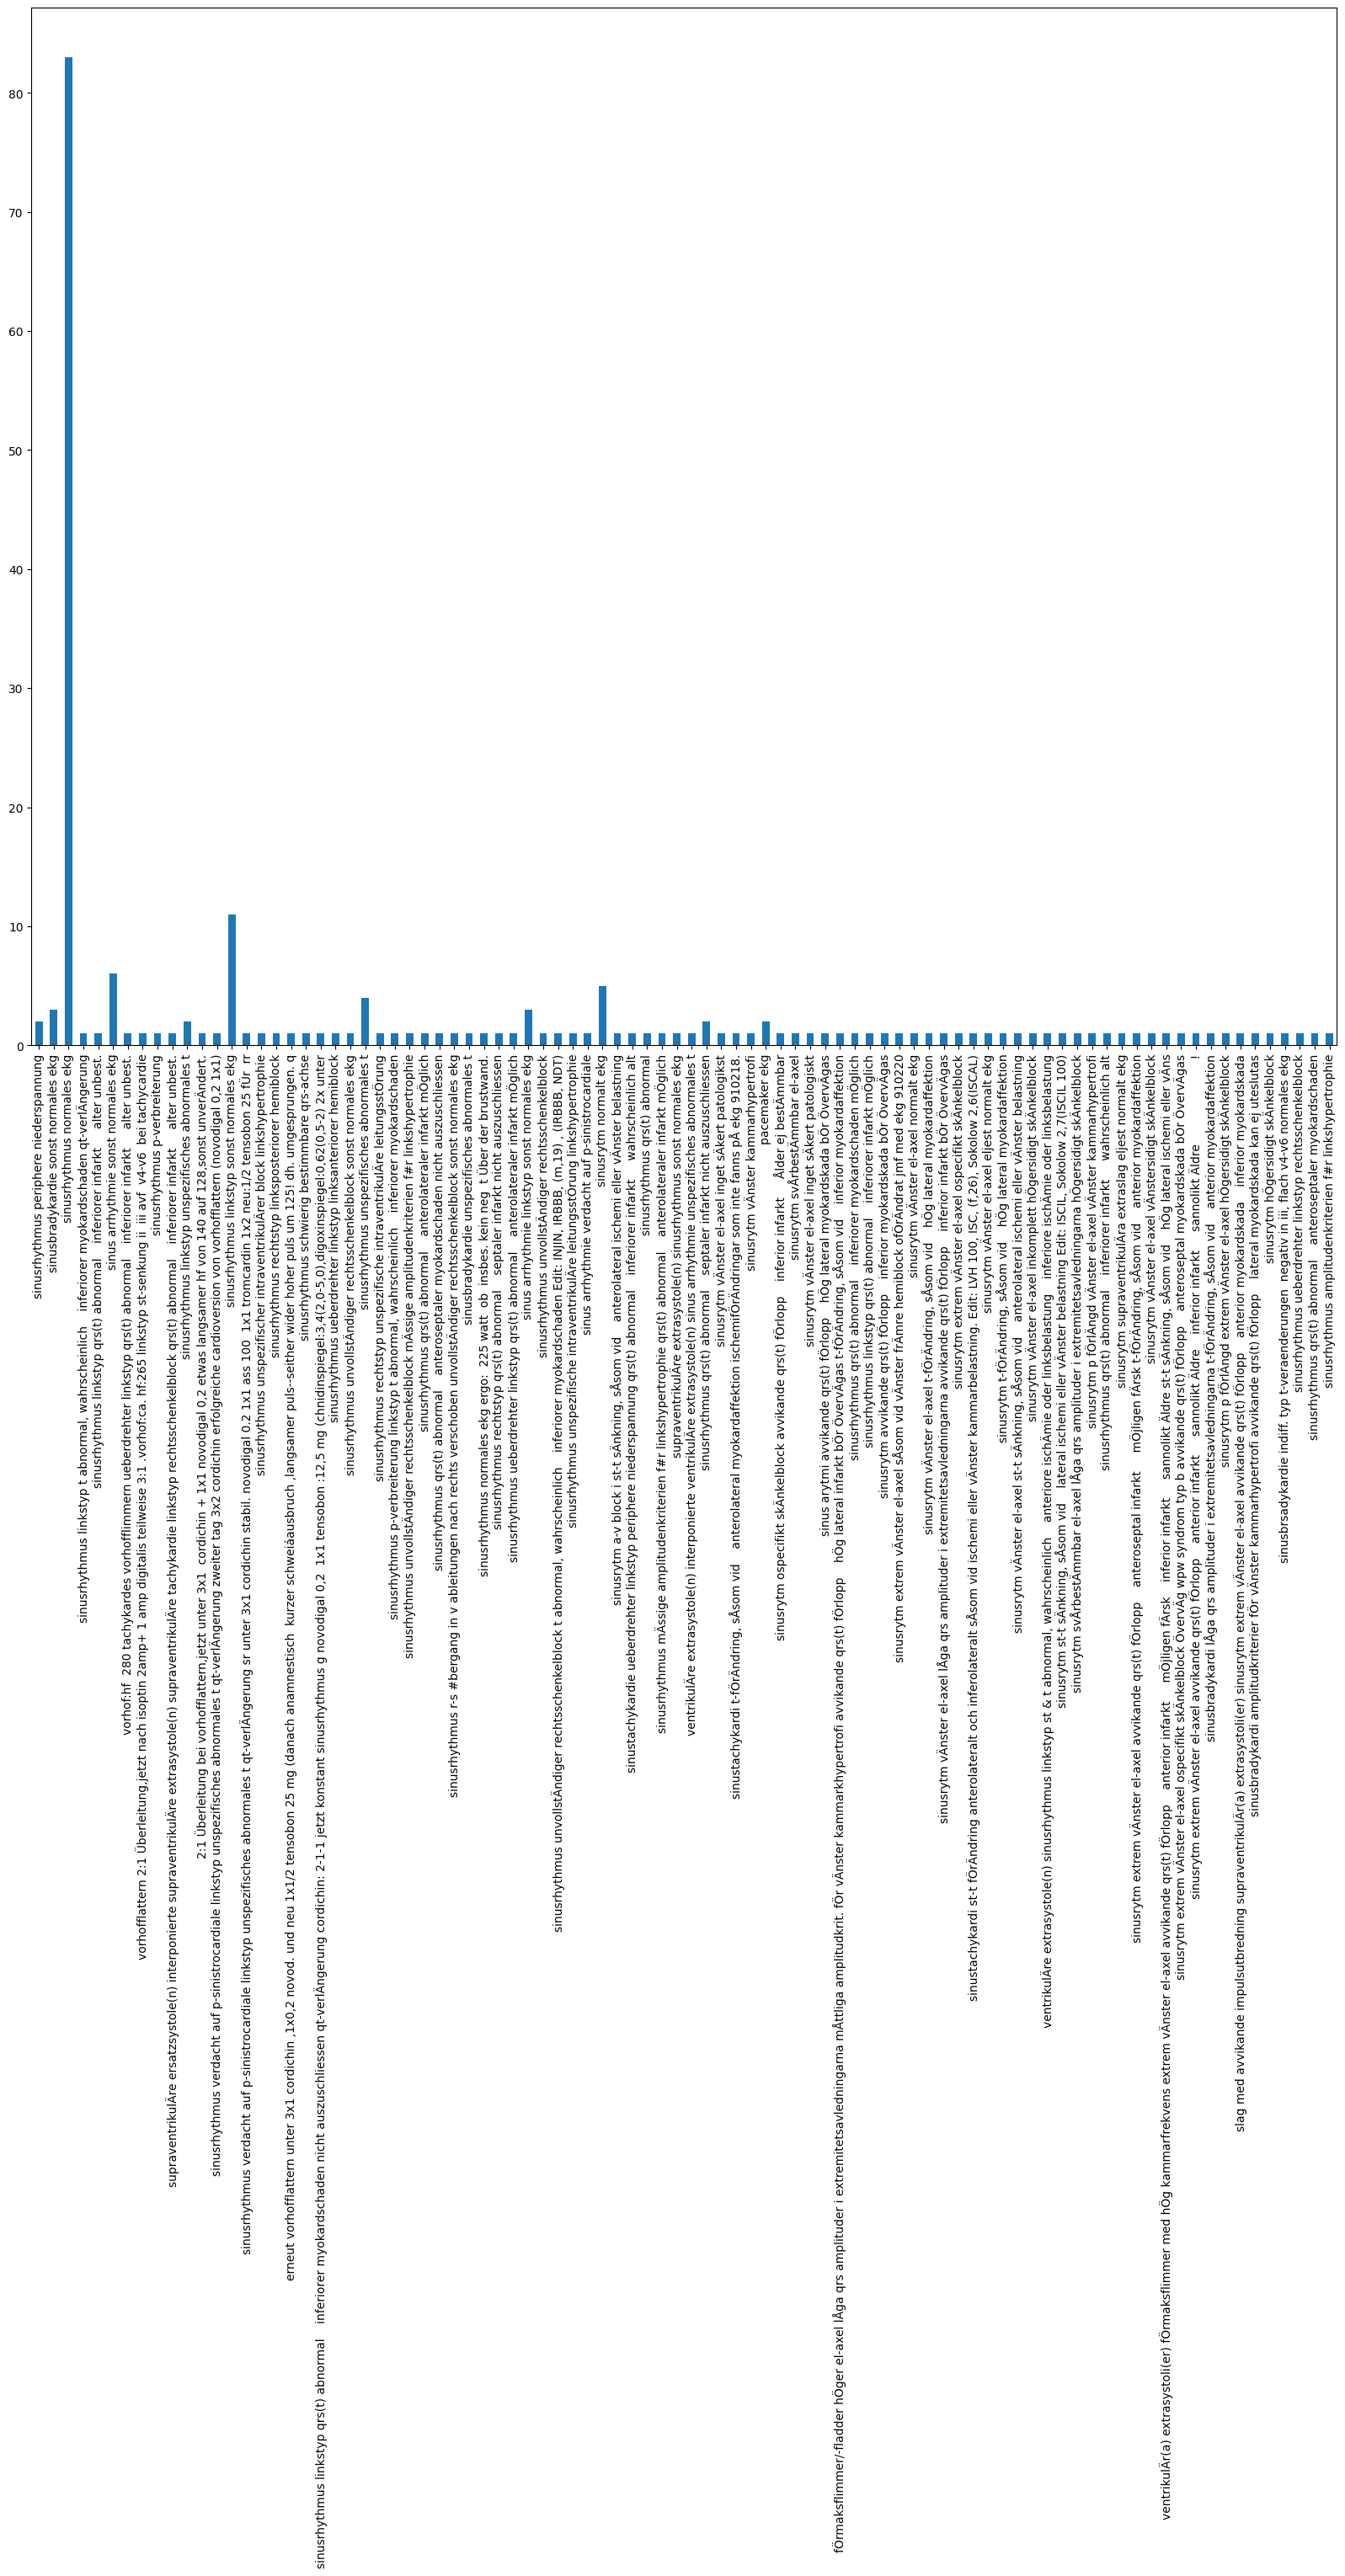

In [214]:
# We reduce data for a clearly plot
pd.Series(report.head(200)).value_counts(sort=False).plot(kind='bar',figsize=(20,16))

In the plot above we can see the most common and less common diagnoses even if the dataset is reduced.

-----

**ECG SIGNALS**

As we can see in the correlation graph (point 2.2.1), there are several variables that have reciprocal relationships. 

These variables are:

    ST-DEPR-MI w/ MI-ALL

    Q-ISC w/ Q-ISC-V2V3

    Q-ISC w/ Q-ISC-Rpeak

So, we will study these variables


In [261]:
# Function to print data about this ECG signals that have reciprocal relationships
def counts(n,y):
    count = ptbxl_ddb.apply(lambda x: x[n] == 1 and x[y] == 1 , axis=1).sum()
    males = ptbxl_ddb.apply(lambda x: x[n] == 1 and x[y] == 1 and x['sex'] == 0, axis=1).sum()
    females = ptbxl_ddb.apply(lambda x: x[n] == 1 and x[y] == 1 and x['sex'] == 1, axis=1).sum()
    return count,males,females

In [255]:
total_patients,males,females = counts('ST-DEPR-MI','MI-ALL')
print('Patients with ST-DEPR-MI and MI-ALL positive = ',total_patients)
print('Males with these positives: ',males)
print('Females with these positives: ',females)

Patients with ST-DEPR-MI and MI-ALL positive =  5725
Males with these positives:  3210
Females with these positives:  2515


In [256]:
total_patients,males,females = counts('Q-ISC','Q-ISC-V2V3')
print('Patients with Q-ISC and Q-ISC-V2V3 positive = ',total_patients)
print('Males with these positives: ',males)
print('Females with these positives: ',females)

Patients with ST-DEPR-MI and MI-ALL positive =  664
Males with these positives:  454
Females with these positives:  210


In [259]:
total_patients,males,females = counts('Q-ISC','Q-ISC-RPeak')
print('Patients with Q-ISC and Q-ISC-Rpeak positive = ',total_patients)
print('Males with these positives: ',males)
print('Females with these positives: ',females)

Patients with Q-ISC and Q-ISC-Rpeak positive =  112
Males with these positives:  91
Females with these positives:  21


**FINAL CONCLUSIONS**

Having seen all the above data, we can determine that the majority of patients with cardiac problems are men while women present a normal ECG.

#### **STEP 3.** Read ECGfiles:

Since there are 21,000 data, we have decided to take a .dat file, which contains the signal (ECG) and make a study based on it.
Obviously, this signal could be replaced by the one the doctor is interested in, according to a diagnosis or positive signals.

**STEP 3.1: Installing and Import Python Packages**

**We install neurokit2 pckg** --> *NeuroKit2 is a user-friendly package providing easy access to advanced biosignal processing routines. Researchers and clinicians without extensive knowledge of programming or biomedical signal processing can analyze physiological data with only two lines of code.* 

**Source:** https://neuropsychology.github.io/NeuroKit/introduction.html

In [40]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install neurokit2


In [118]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 1.4 MB/s eta 0:00:0000:0100:010m


In [41]:
import neurokit2 as nk

**STEP 3.2: Plotting and Analyzing ECG signals**

In [361]:
# Open ECG signal file
%matplotlib inline
rcParams['figure.figsize'] = [30, 15]  # Bigger images
import warnings
warnings.filterwarnings("ignore")

f = open('/Users/ledito/Downloads/Idoven-Data-Scientist-main/data/physionet.org/files/ptb-xl/1.0.2/records100/00000/00002_lr.dat', "r")
a = np.fromfile(f, dtype = np.dtype('>i4'))

ecg_signal = np.array(a)

In [362]:
# Class to analyzing sECG data
class Ecg_processing(): 
  def __init__(self, ecg):
    self.ecg = ecg
  
  # With this function we plot ECG signals
  def plot_signals(self,t):
    plt.plot(self.ecg)
    plt.title(t,fontsize = 20)
    plt.figure()
    plt.plot(self.ecg[2000:2400])
    plt.title(t+"[2000:2400]",fontsize = 20)
  
  def evaluate_signals(self,sampling):
    signals, info = nk.ecg_process(self.ecg, sampling_rate=sampling)
    nk.ecg_plot(signals, sampling_rate=sampling, show_type="full")
    plt.figure()
    nk.signal_plot([signals['ECG_Clean'], signals['ECG_Quality']], standardize=True)
    plt.title("Quality evaluation")

  # In this function we'll only use the original data because implicitly the data is already cleaned.
  def study_signals(self,sampling):
      signals = pd.DataFrame({"ECG_Raw" : self.ecg,
                              "ECG_NeuroKit" : nk.ecg_clean(self.ecg, sampling_rate=sampling, method="neurokit"),
                              "ECG_BioSPPy" : nk.ecg_clean(self.ecg, sampling_rate=sampling, method="biosppy"),
                              "ECG_PanTompkins" : nk.ecg_clean(self.ecg, sampling_rate=sampling, method="pantompkins1985"),
                              "ECG_Hamilton" : nk.ecg_clean(self.ecg, sampling_rate=sampling, method="hamilton2002"),
                              "ECG_Elgendi" : nk.ecg_clean(self.ecg, sampling_rate=sampling, method="elgendi2010"),
                              "ECG_EngZeeMod" : nk.ecg_clean(self.ecg, sampling_rate=sampling, method="engzeemod2012")})

      rcParams['figure.figsize'] = [20, 10]  # Bigger images
      signals.head(50).plot()
      plt.title('signal study', fontsize=20)
  
  def detect_qrs_complex(self,method):
    r_signals, r_info = nk.ecg_peaks(self.ecg, sampling_rate=200)
    signal, waves_peak = nk.ecg_delineate(self.ecg, r_info['ECG_R_Peaks'], sampling_rate=100, method=method, show=True, show_type='all')
    plt.title('QRS complex of an electrocardiac signal (ECG) including P-peaks, T-peaks, as well as their onsets and offsets.')
    plt.figure()
    # Plotting first 3 R-peaks focusing on T_peaks, P-peaks, Q-peaks and S-peaks
    plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], self.ecg[:1000])
        

We evaluate the data:

    1. Using original data
    
    2. Using cleaned data

to decide which data give us the best results

*3.2.1 ORIGINAL DATA*

In [363]:
ecg_processing = Ecg_processing(ecg_signal)

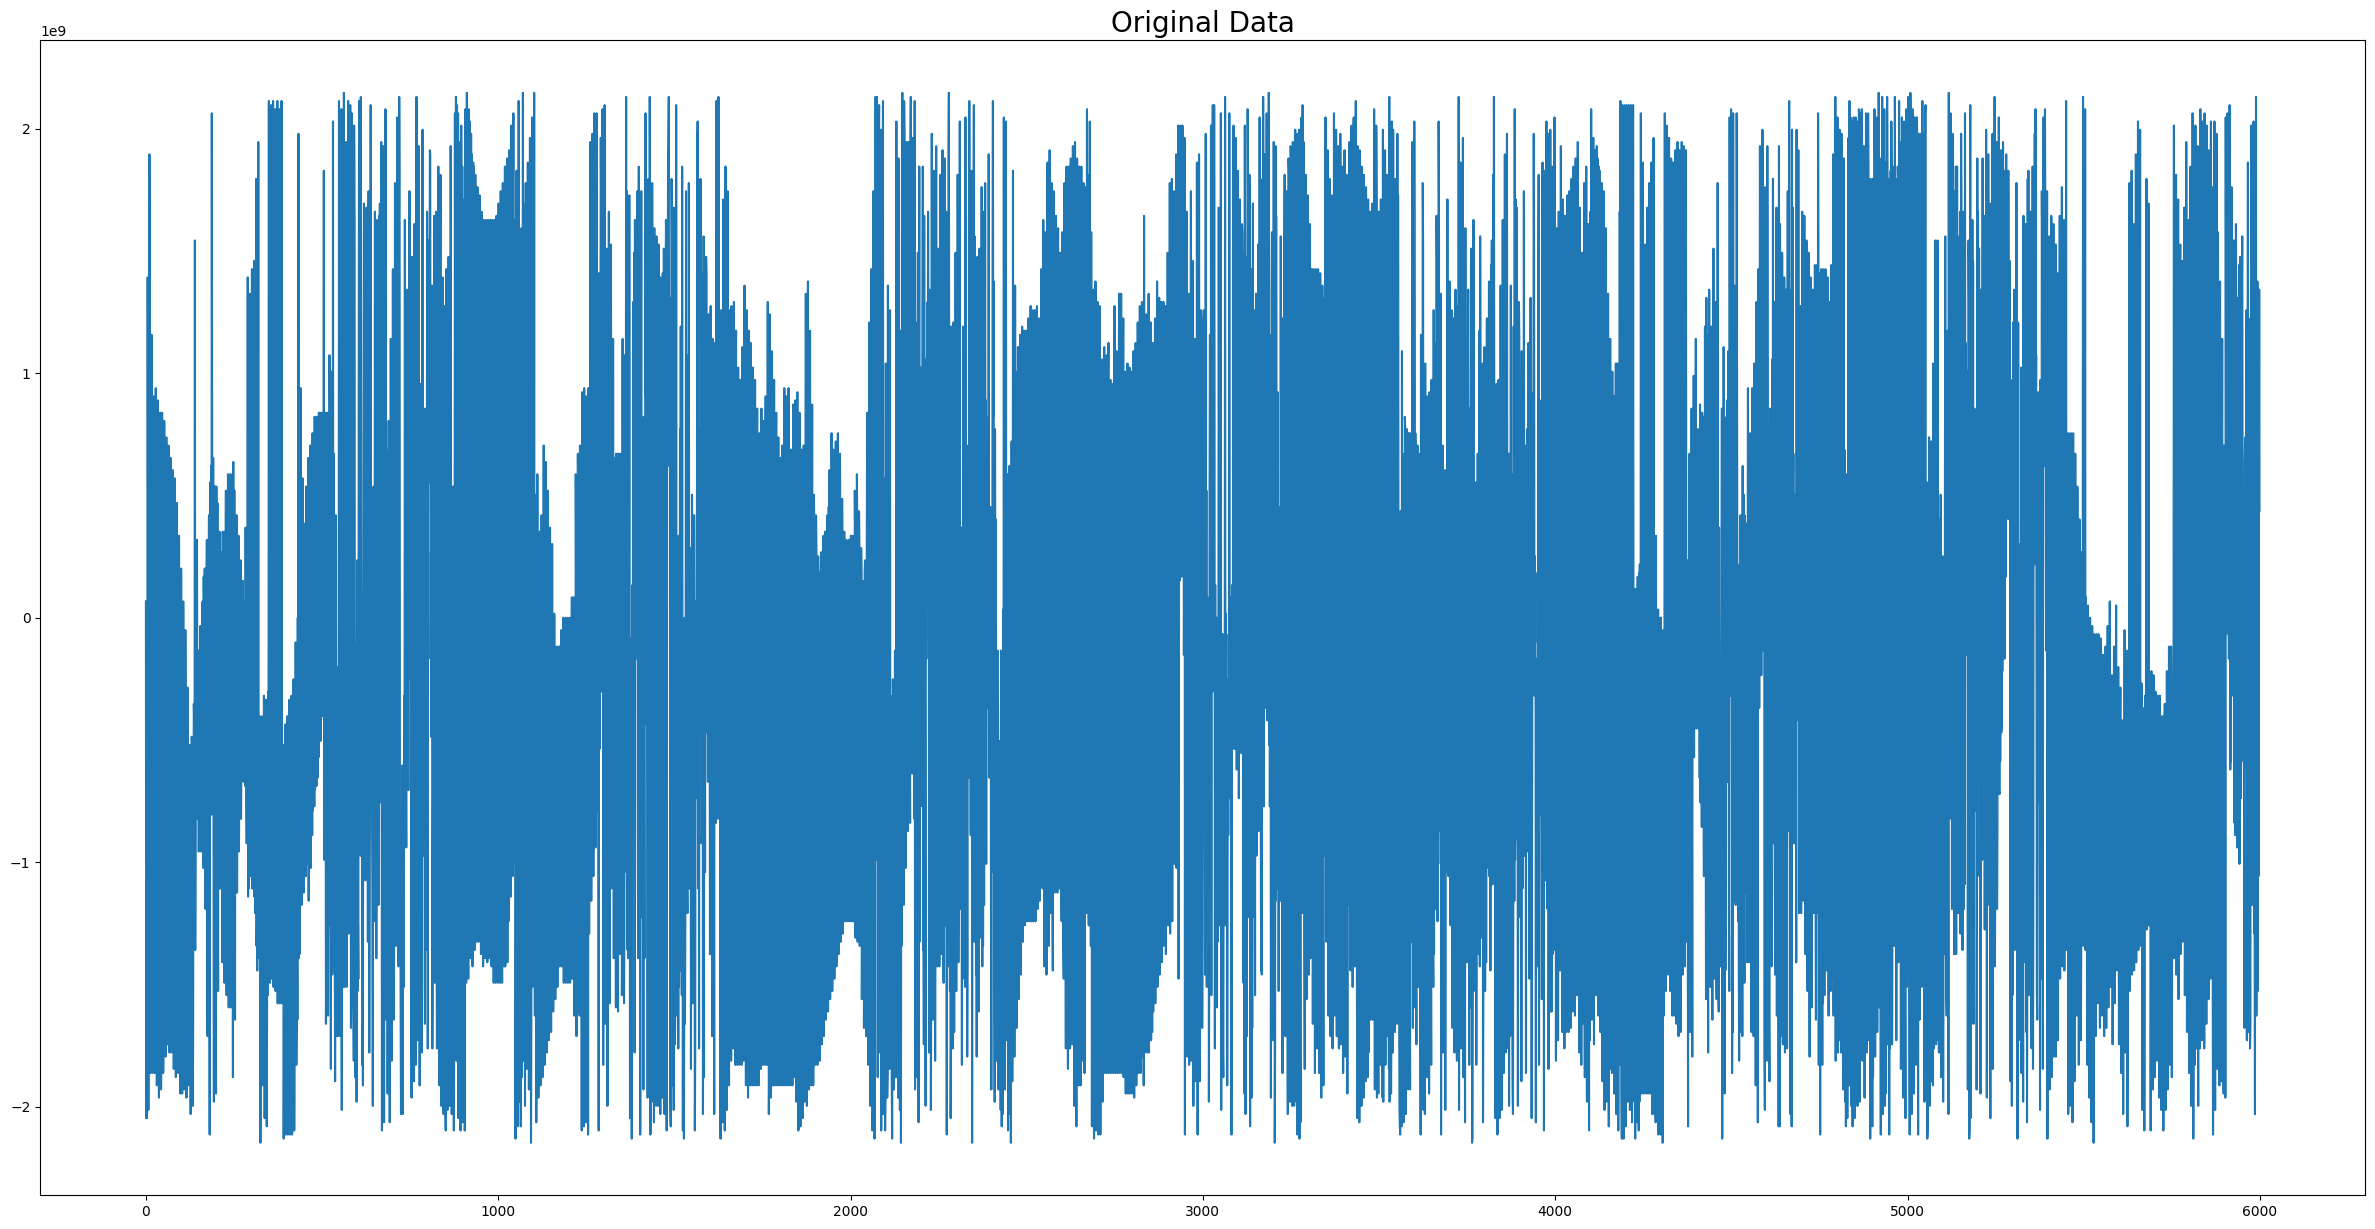

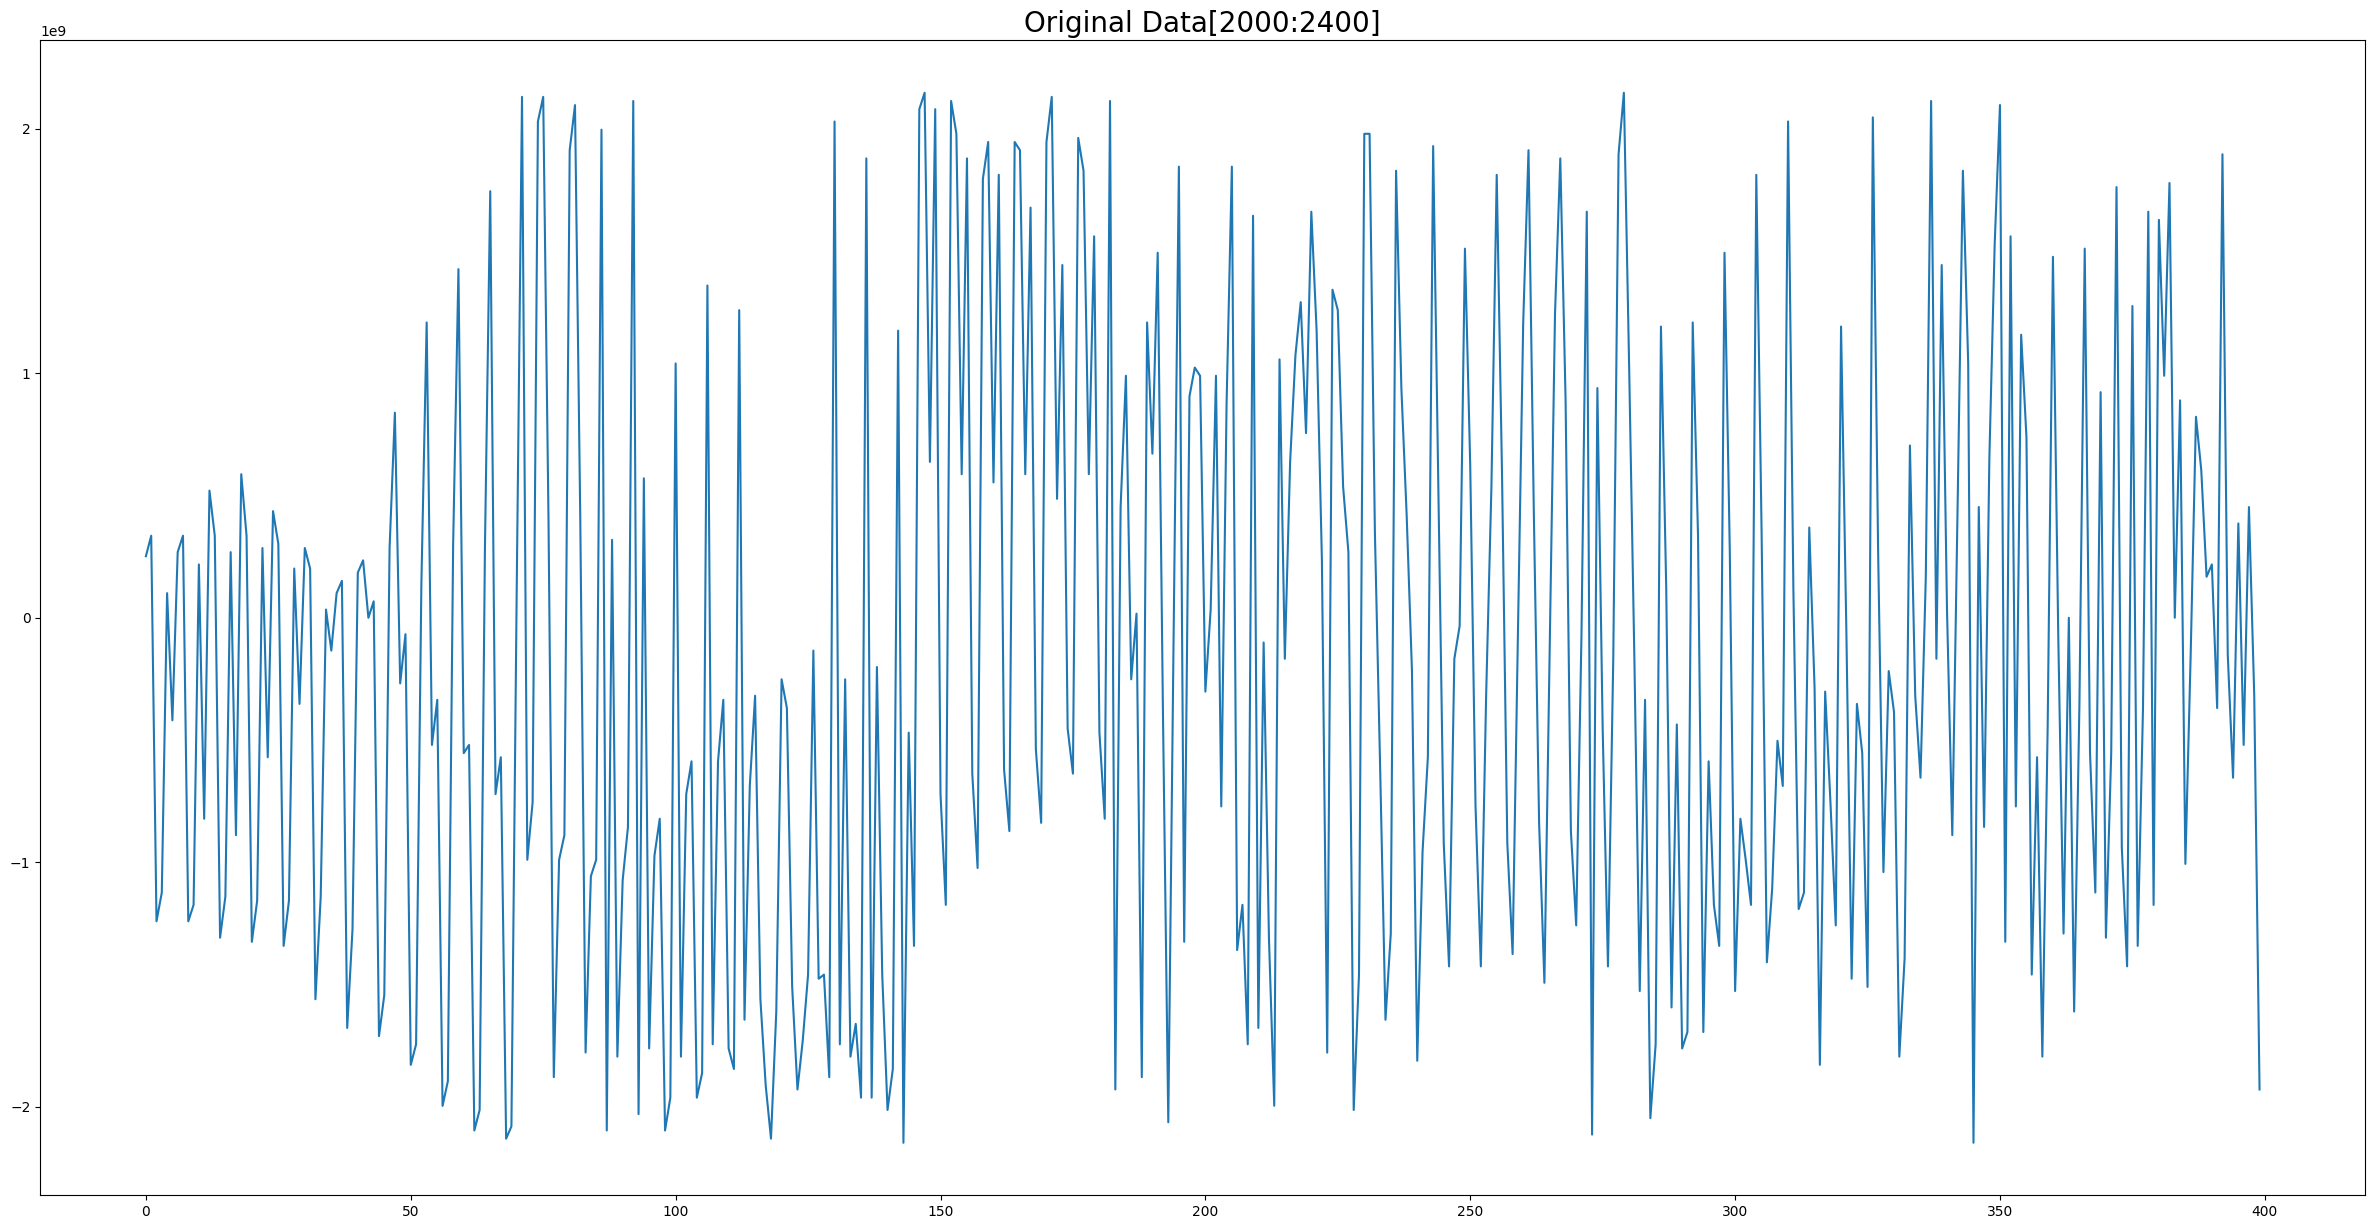

In [364]:
ecg_processing.plot_signals('Original Data')

PLOT CARDIAC ACTIVITY with Original Data

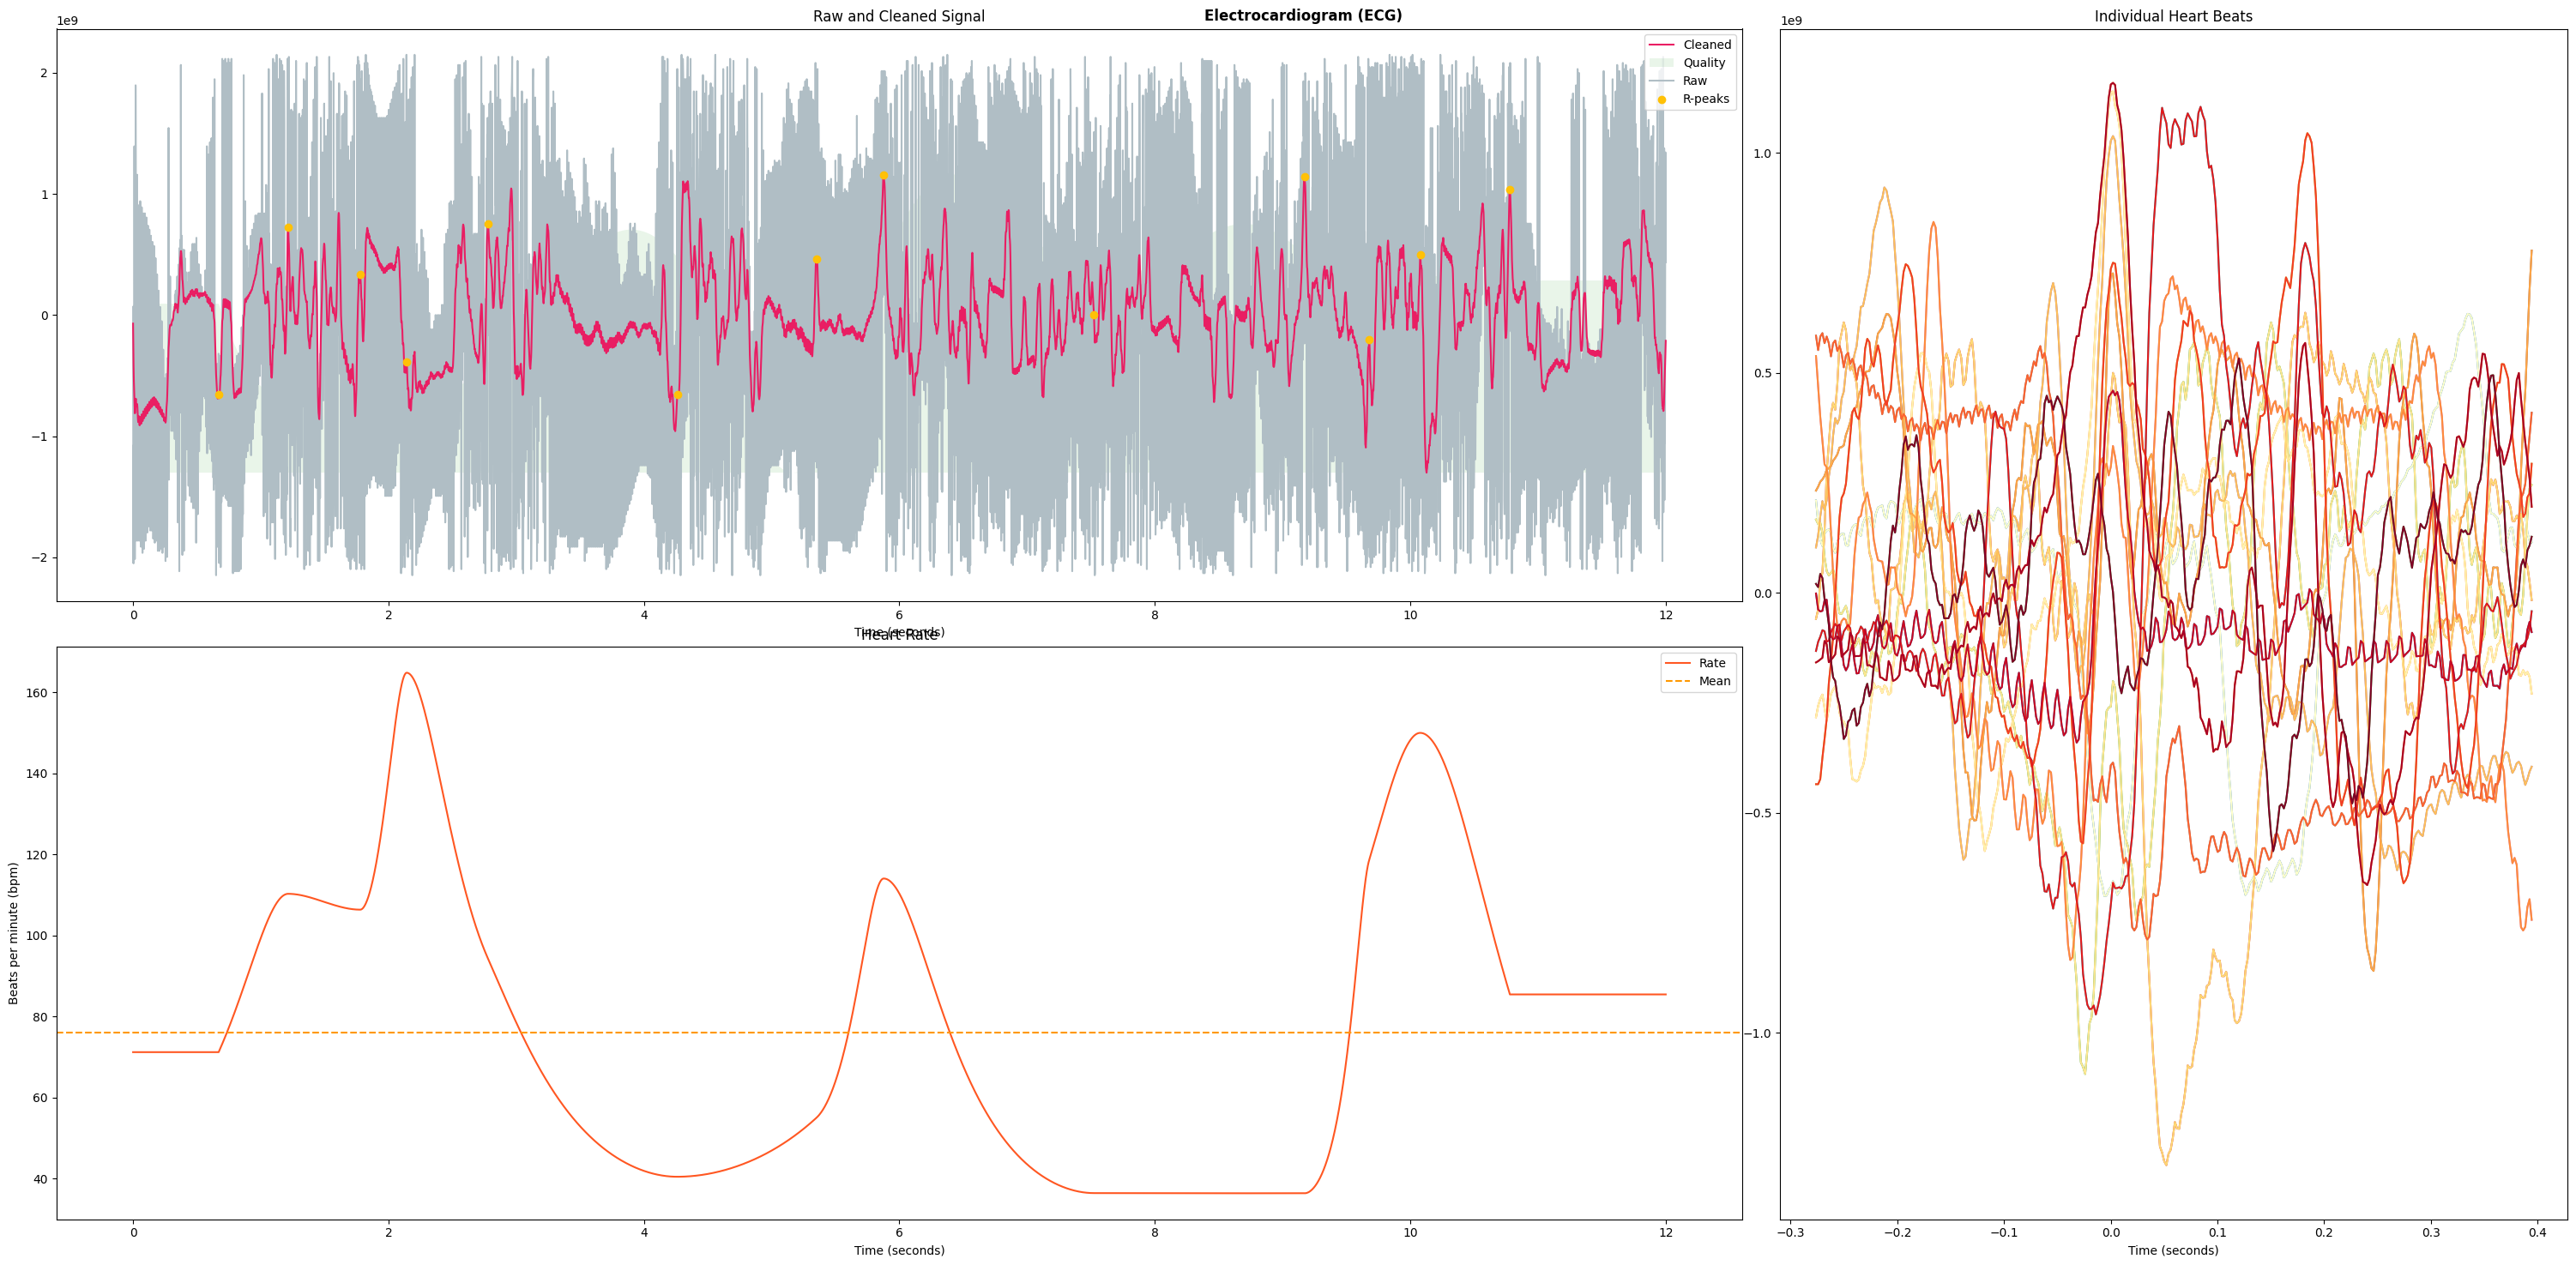

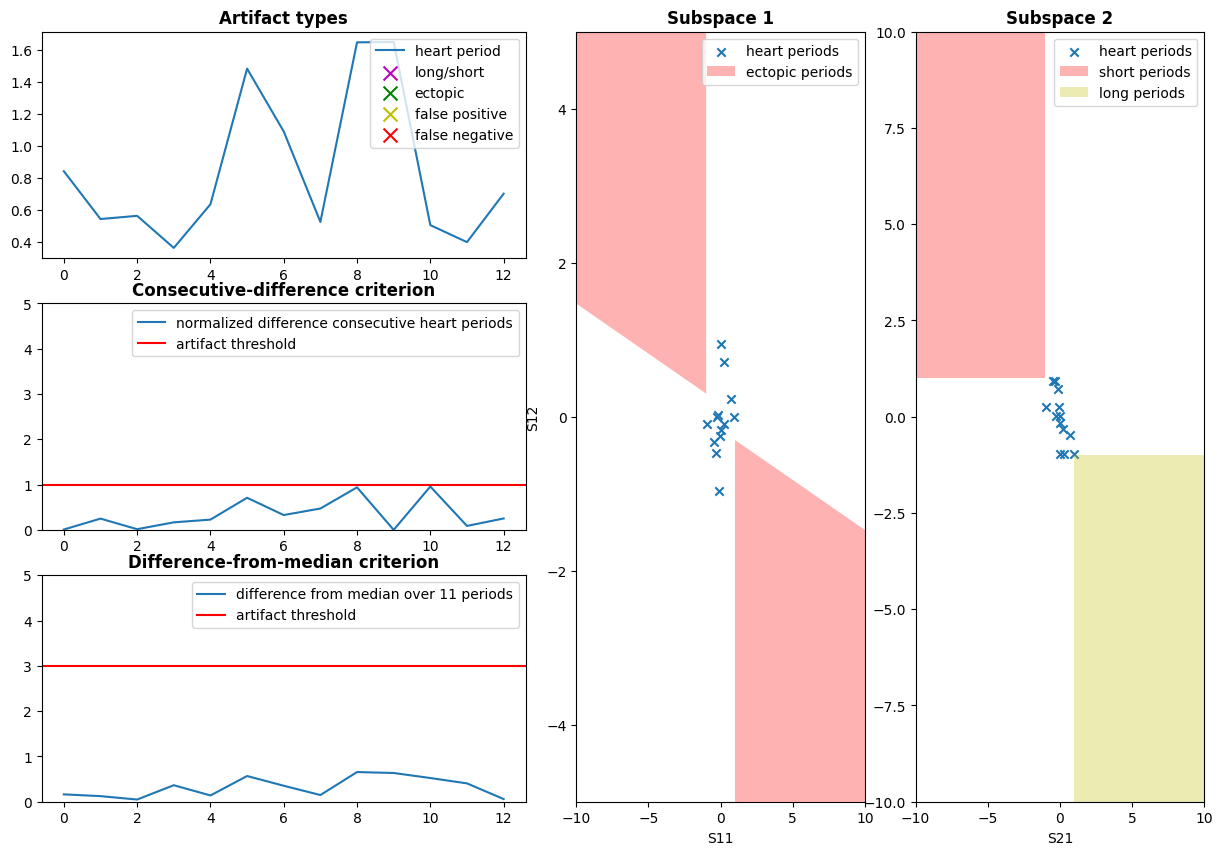

<Figure size 3000x1500 with 0 Axes>

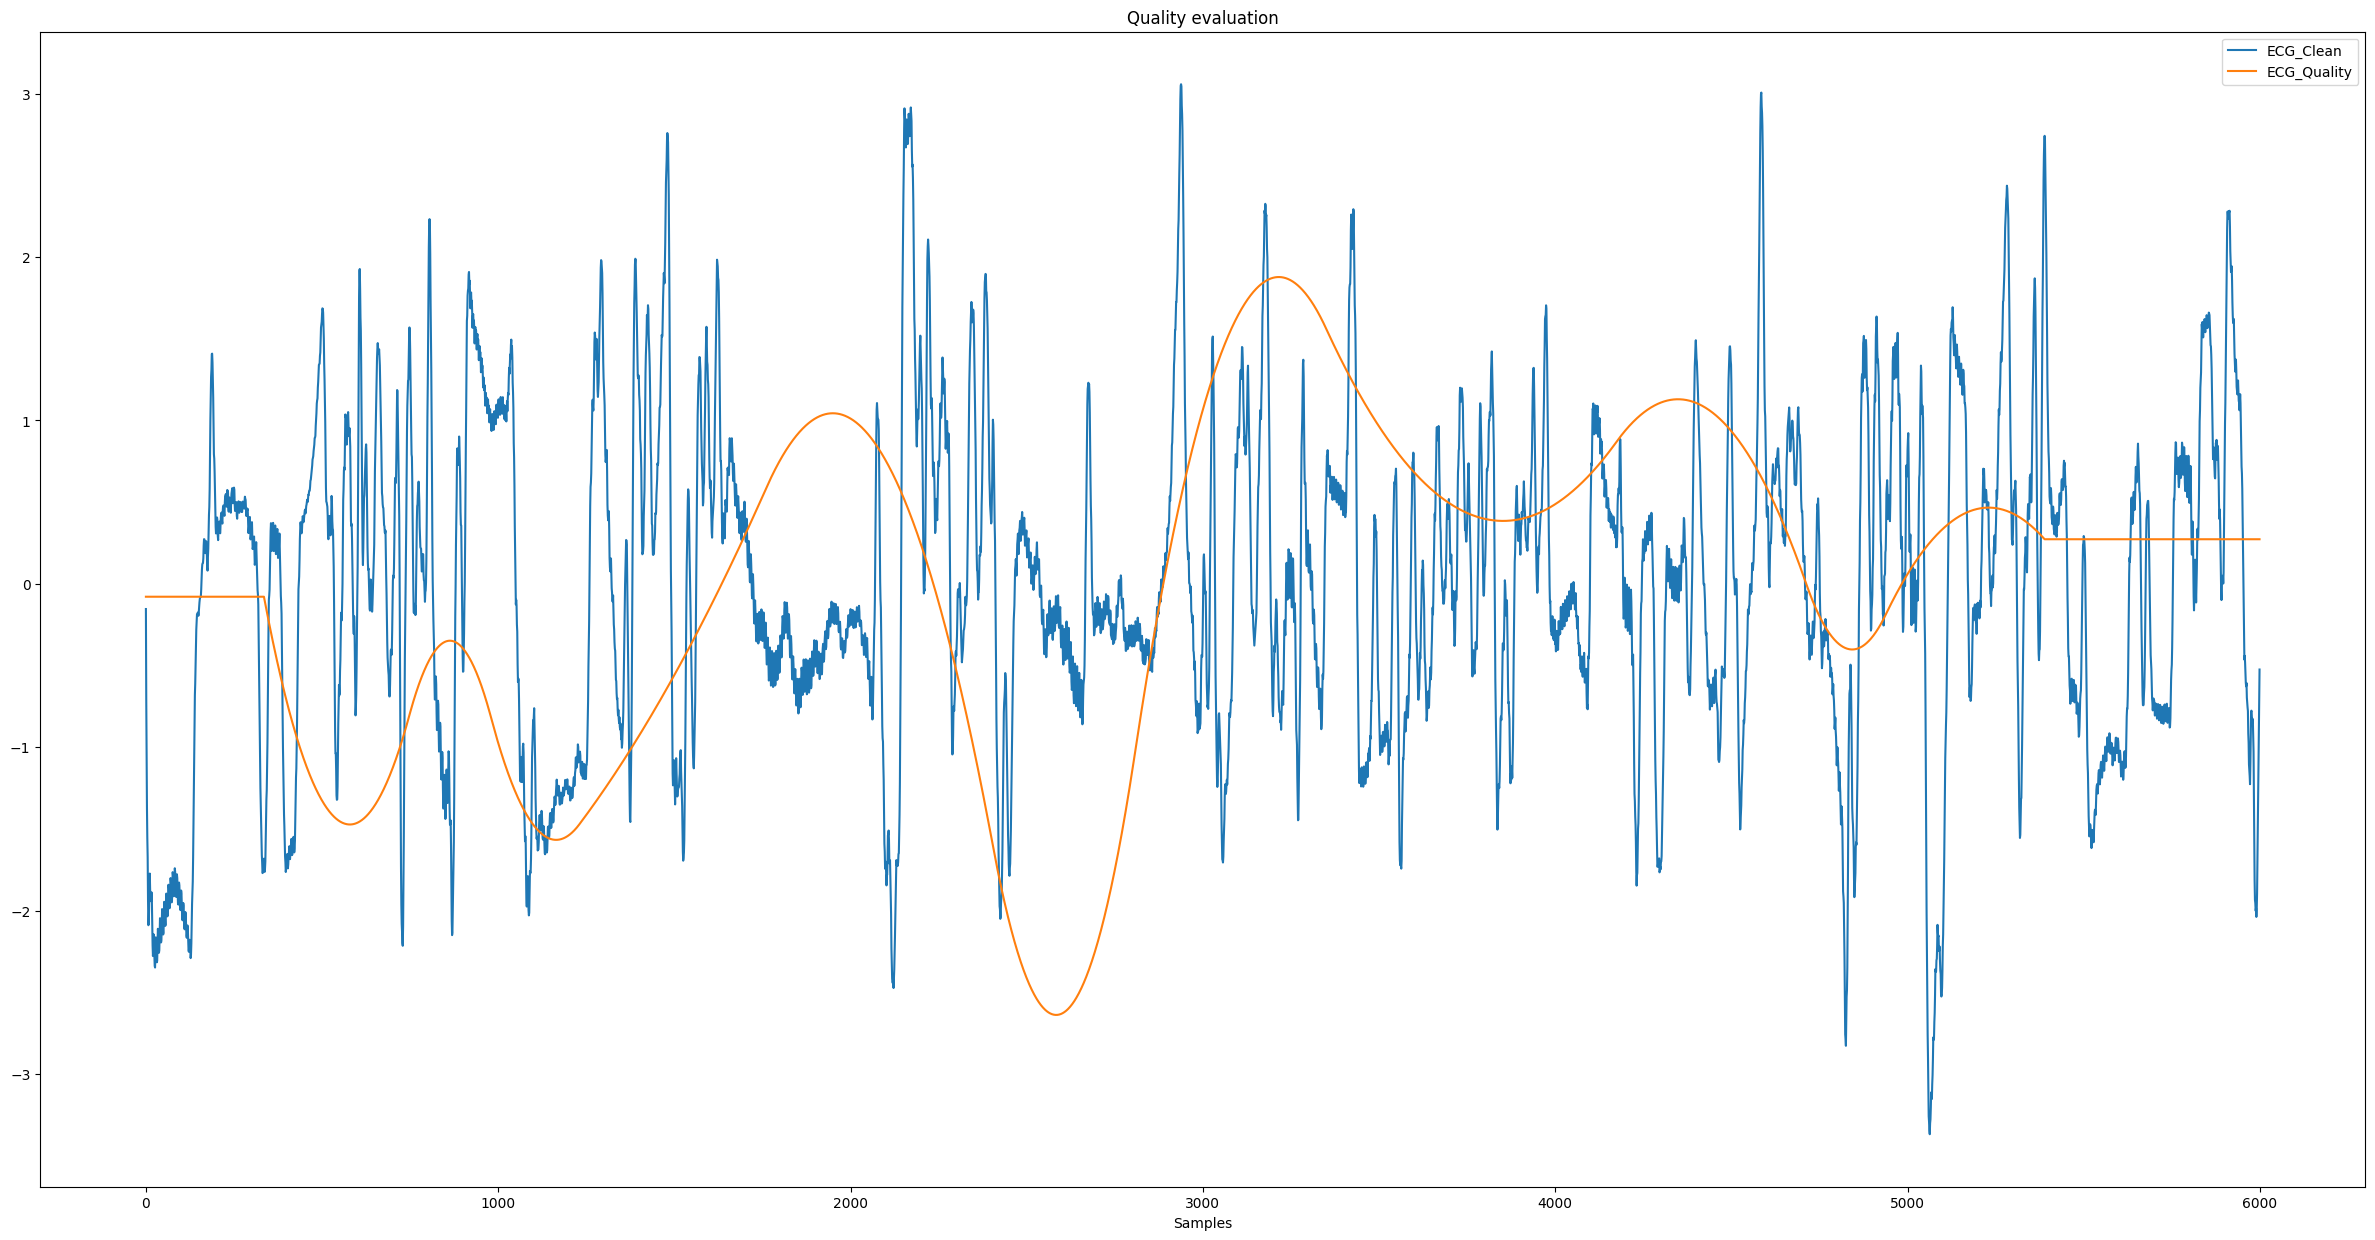

In [365]:
ecg_processing.evaluate_signals(500)

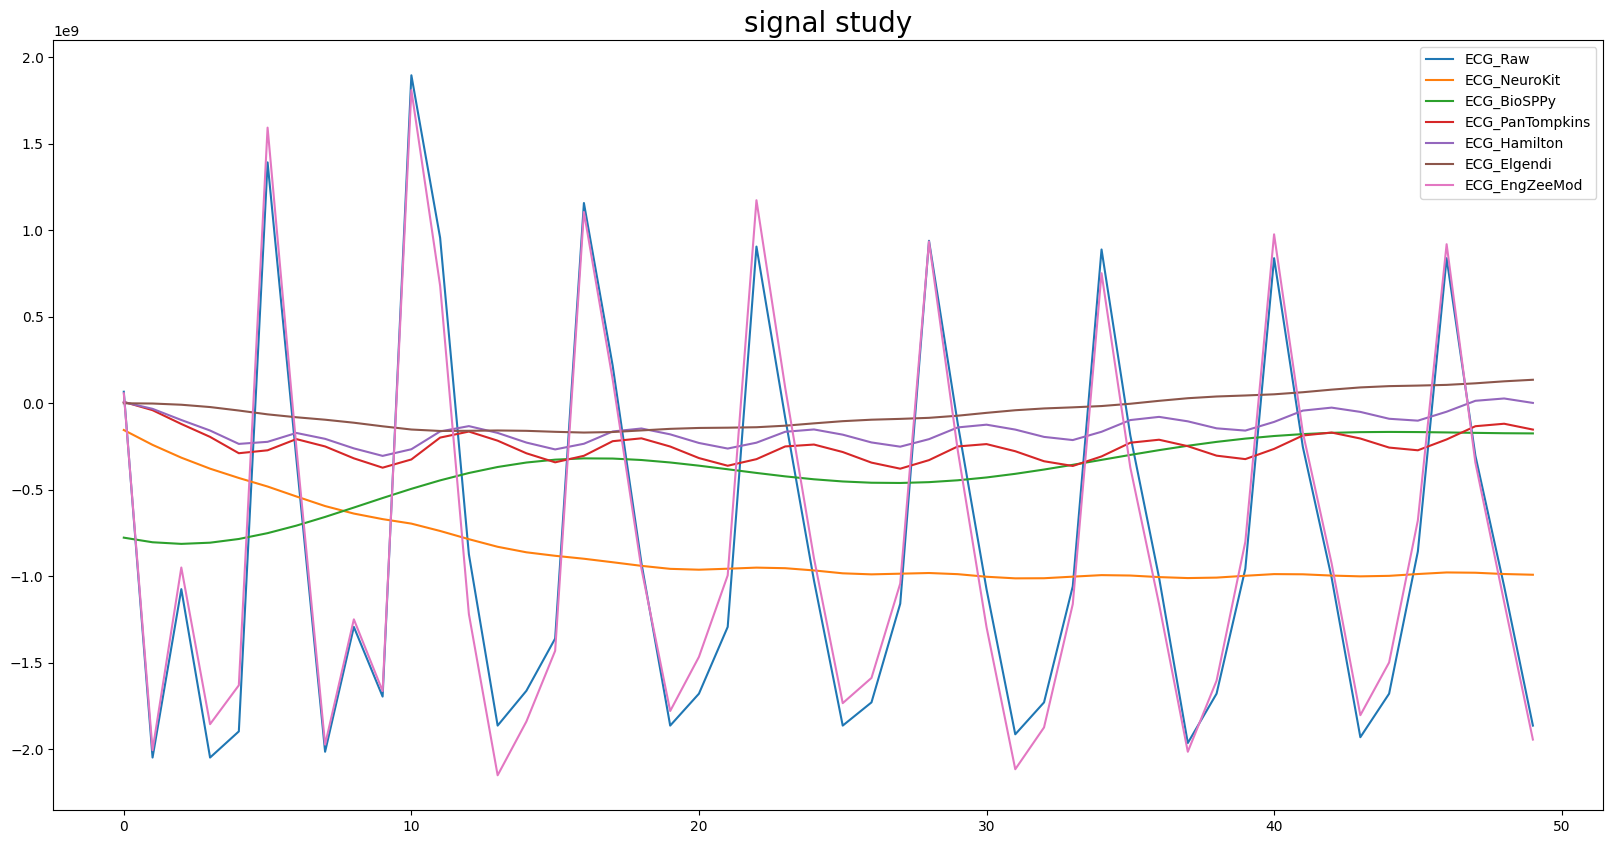

In [344]:
ecg_processing.study_signals(1000)

*3.2.2 CLEANED DATA*

In [352]:
cleaned_ecg = nk.ecg_clean(ecg_signal, sampling_rate=200, method='neurokit')
ecg_processing = Ecg_processing(cleaned_ecg)

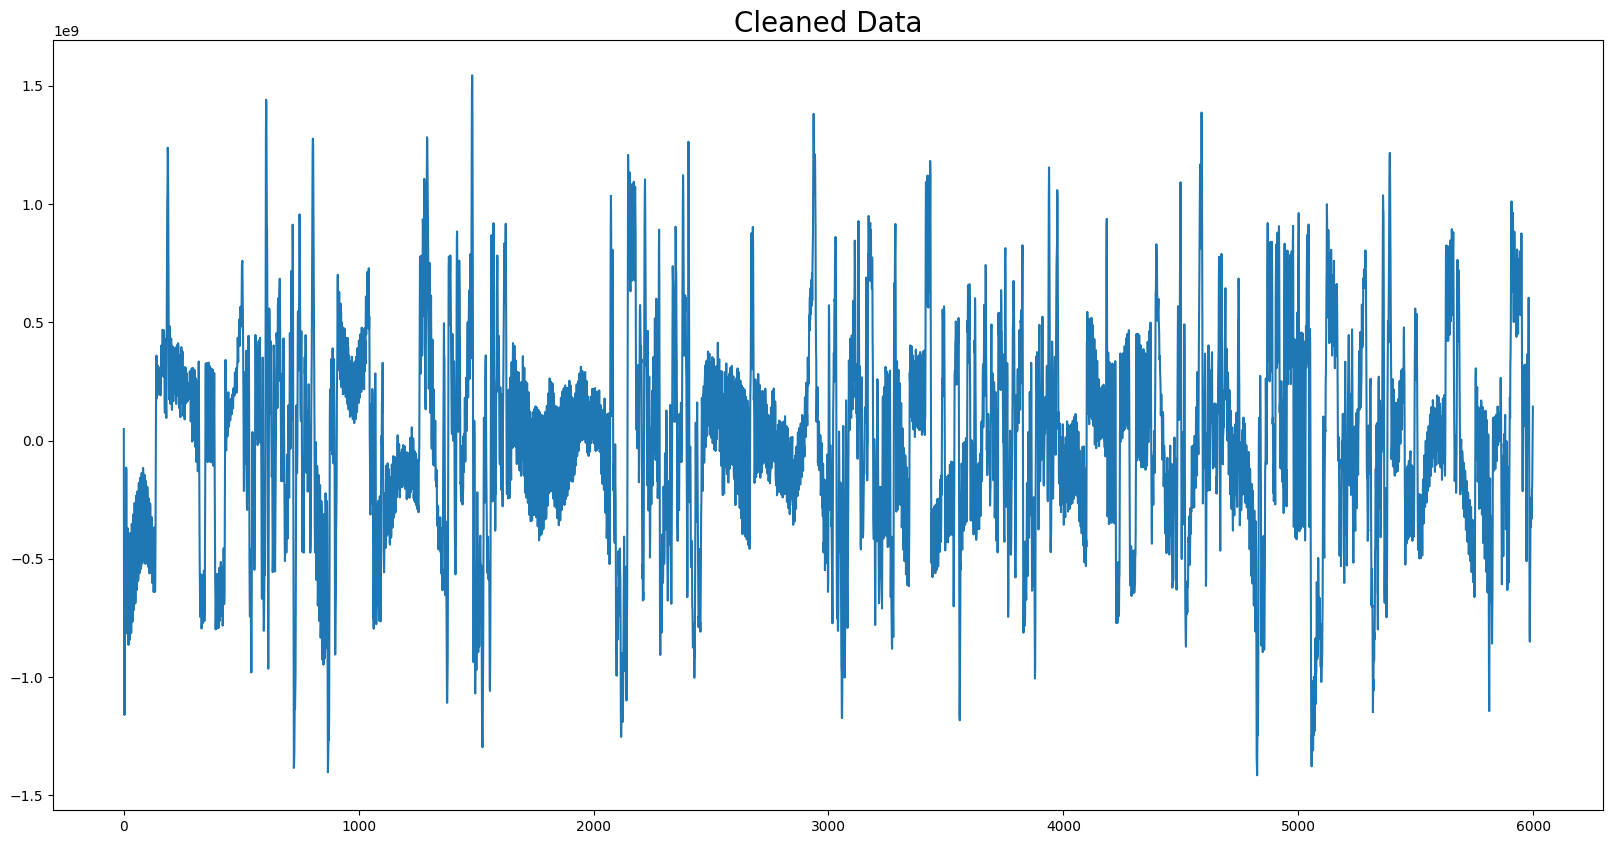

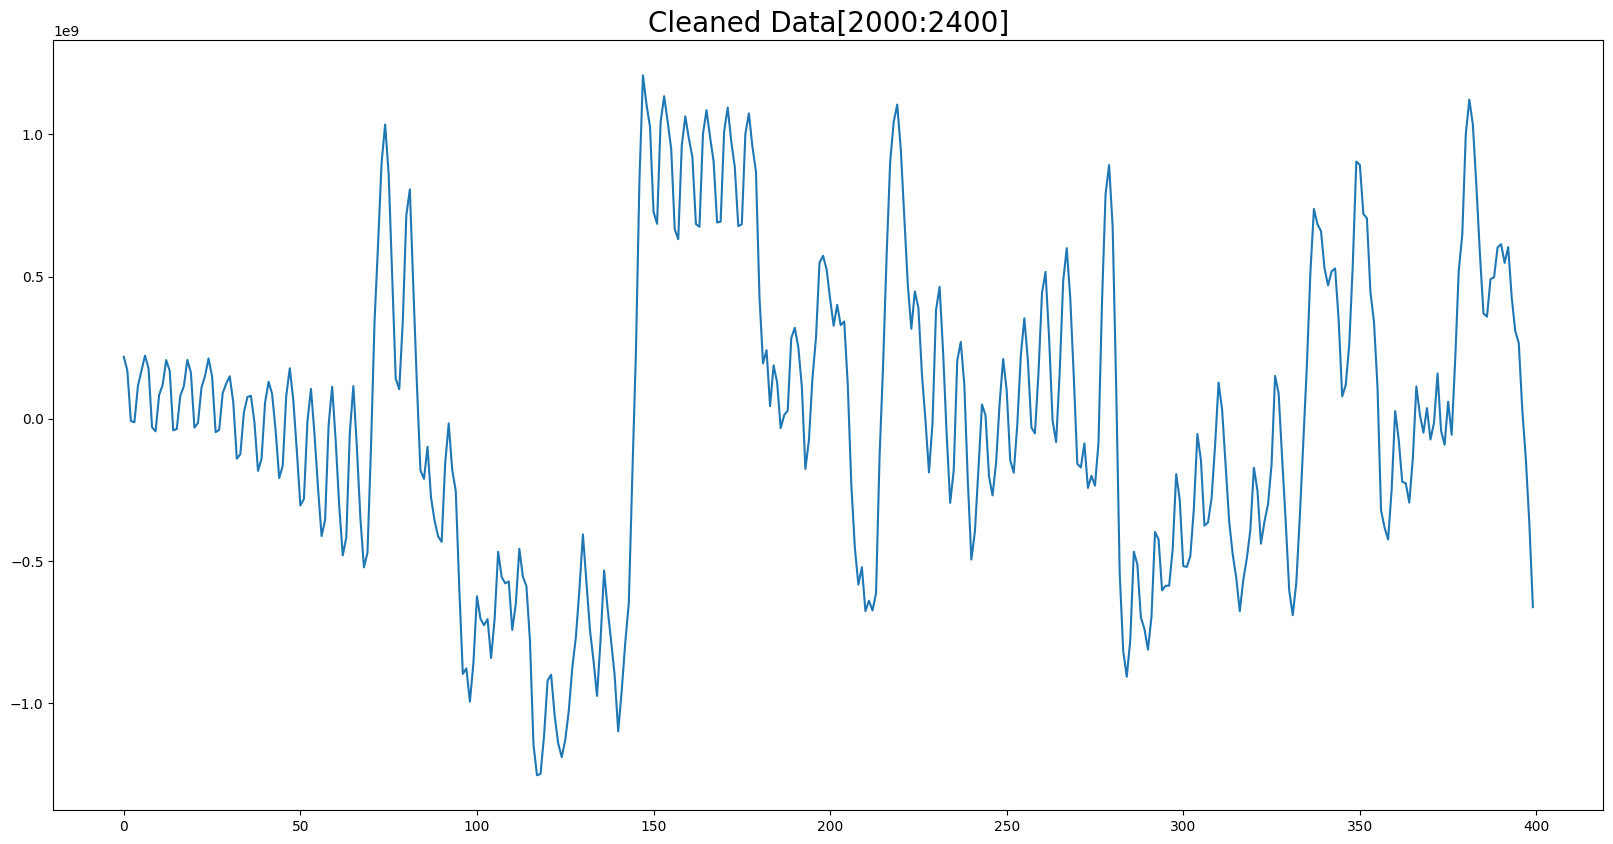

In [346]:
ecg_processing.plot_signals('Cleaned Data')

PLOT CARDIAC ACTIVITY WITH CLEANED DATA

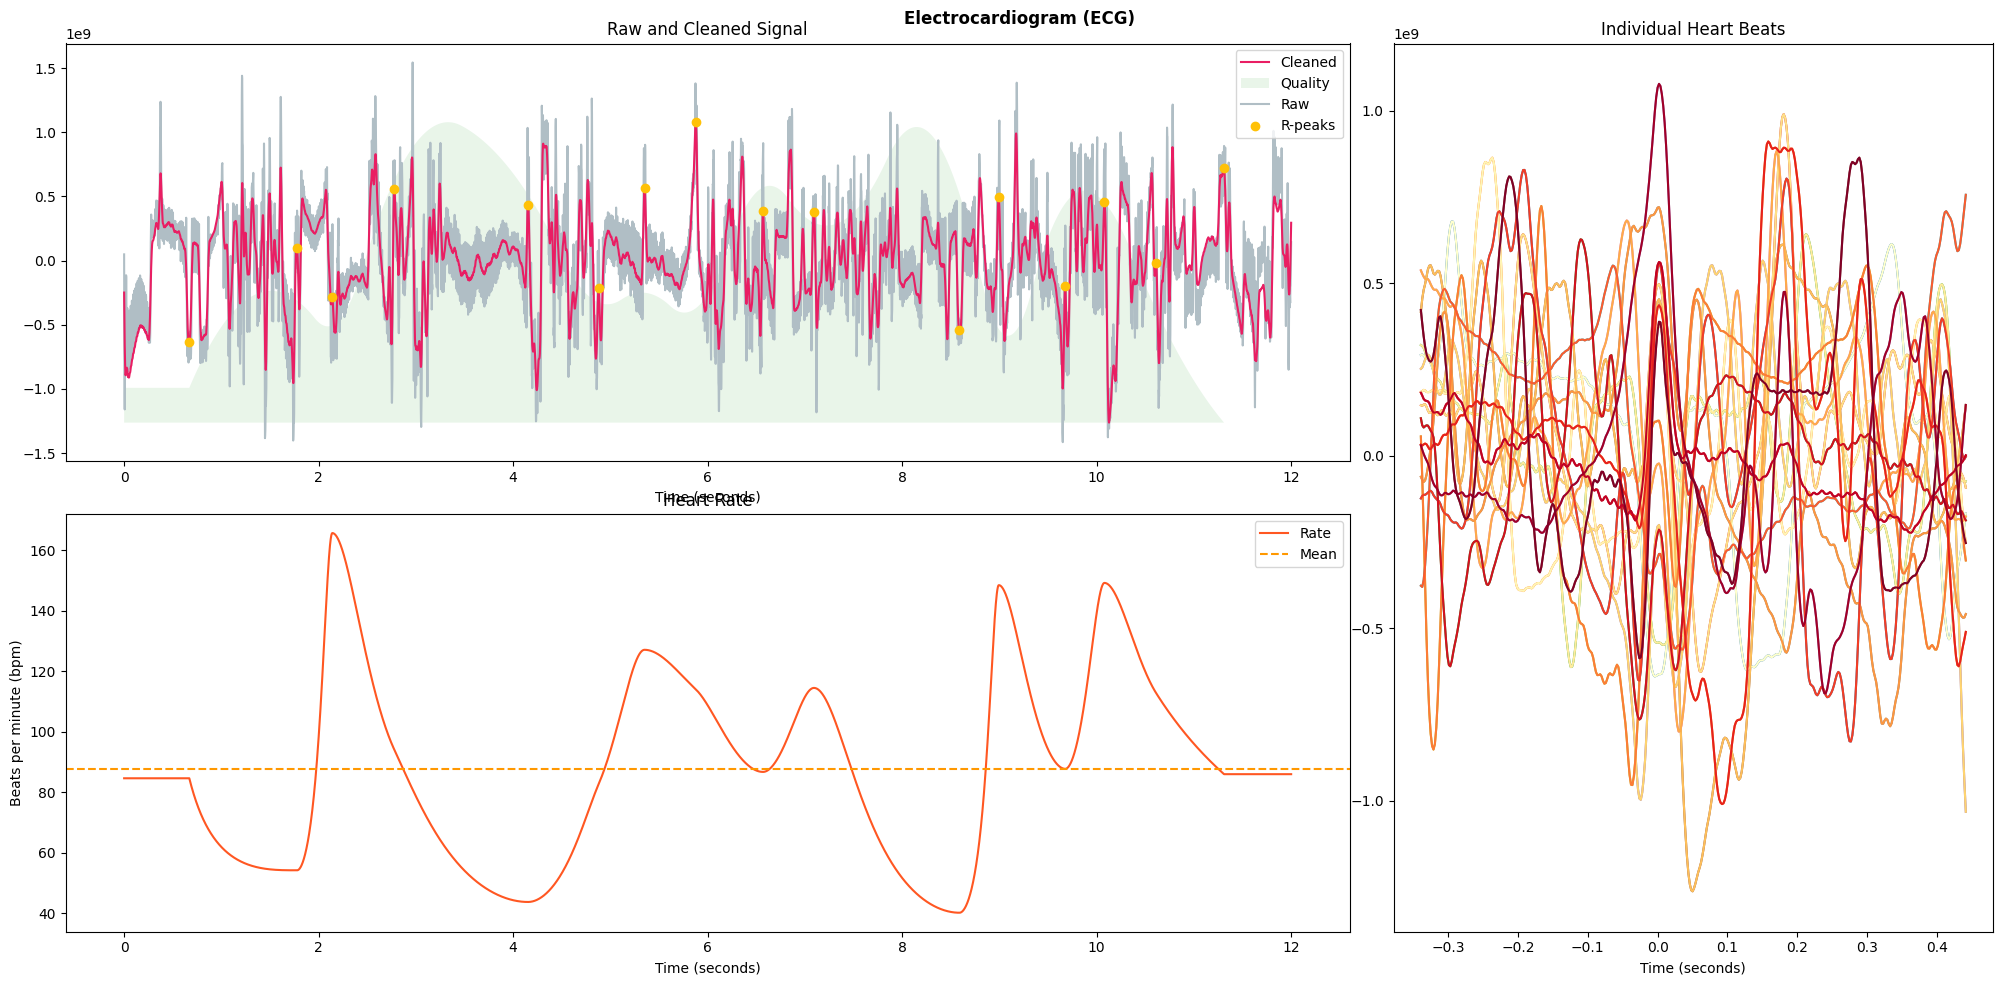

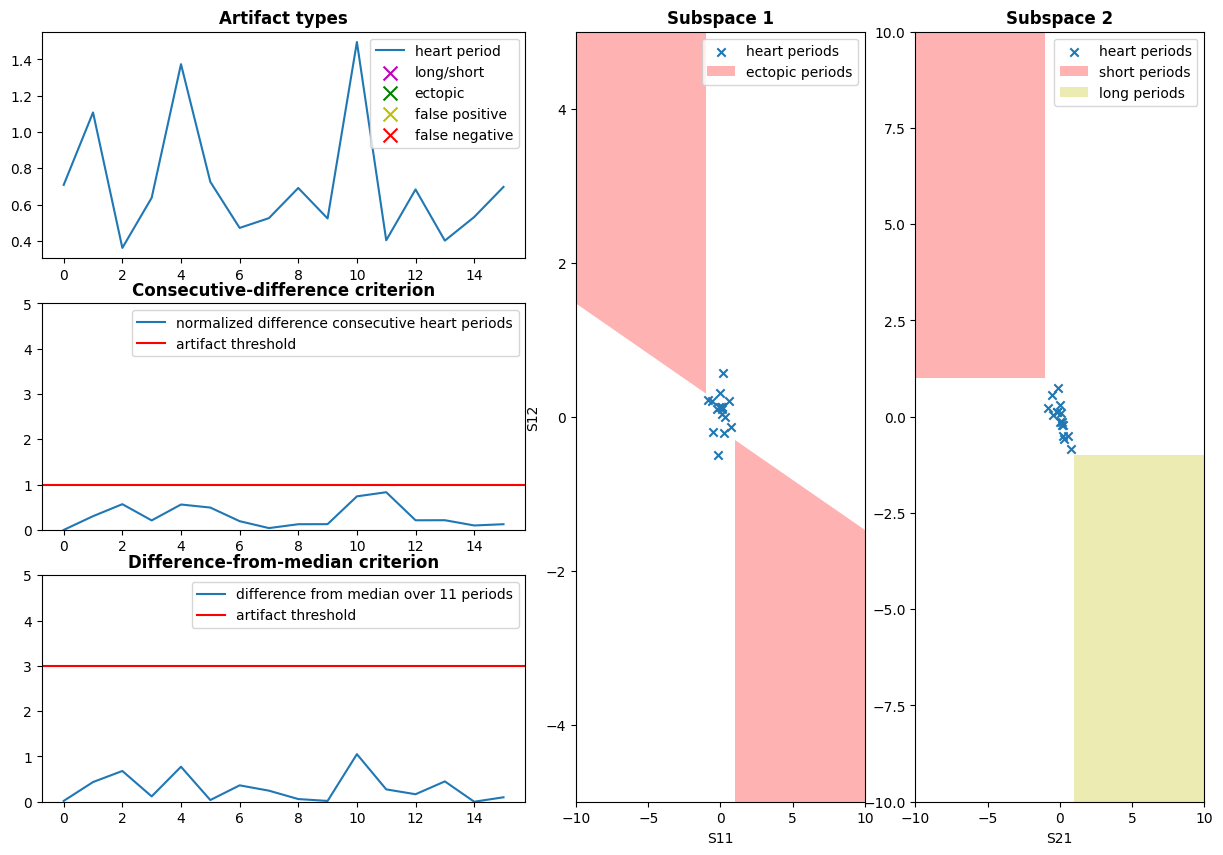

<Figure size 2000x1000 with 0 Axes>

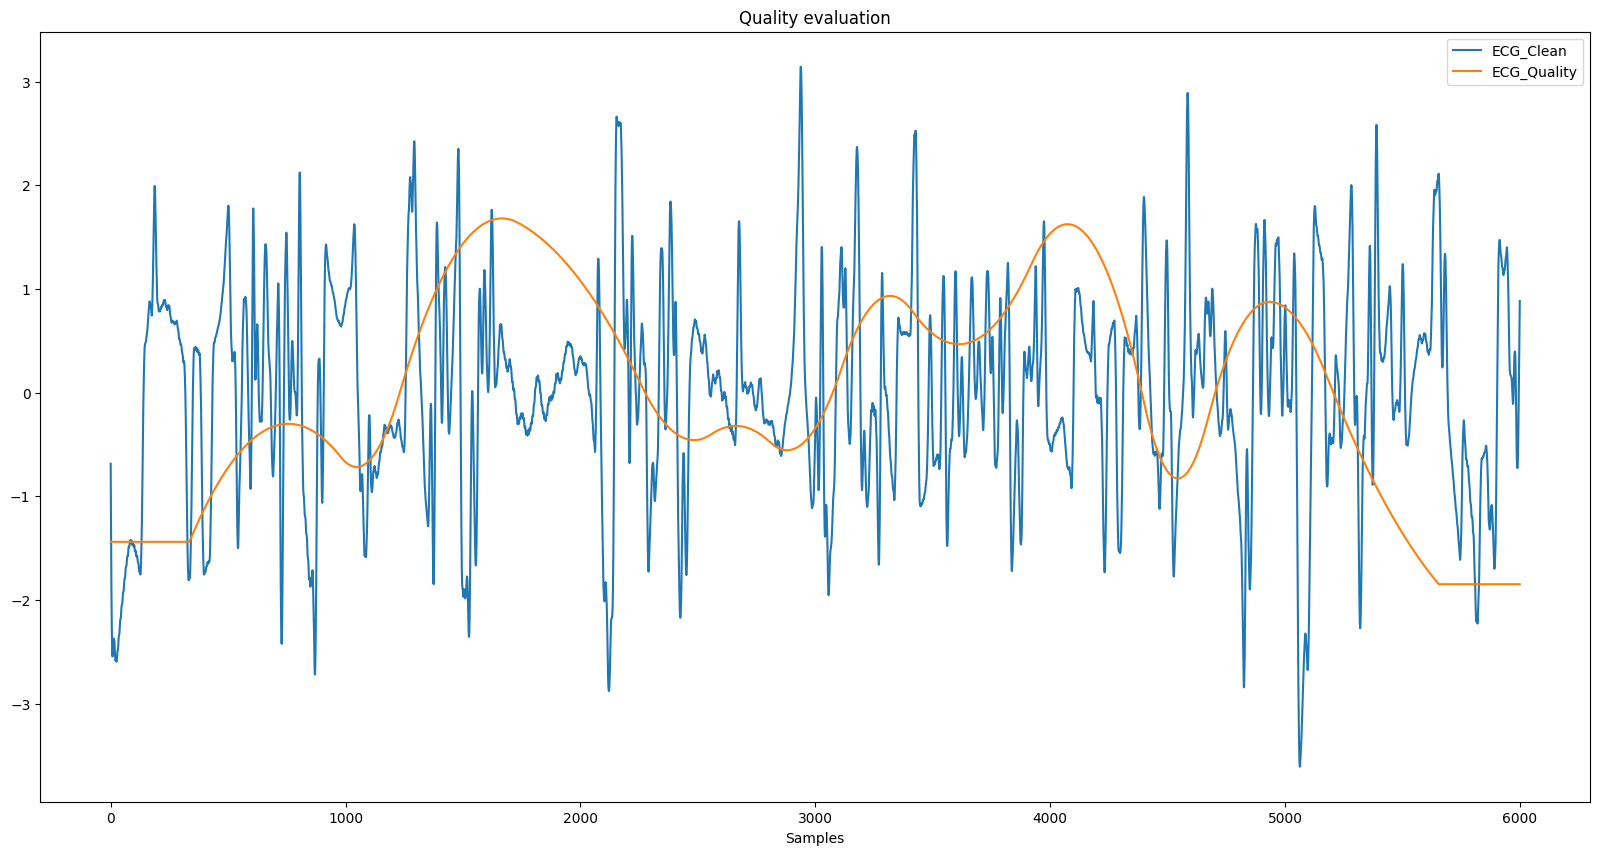

In [347]:
ecg_processing.evaluate_signals(500)

Clonclusion: Since cleaning the signal makes it look much better, it was decided to work with the clean signals. 

**DETECT COMPLEX QRS** 

1 - QRS complex with dwt method

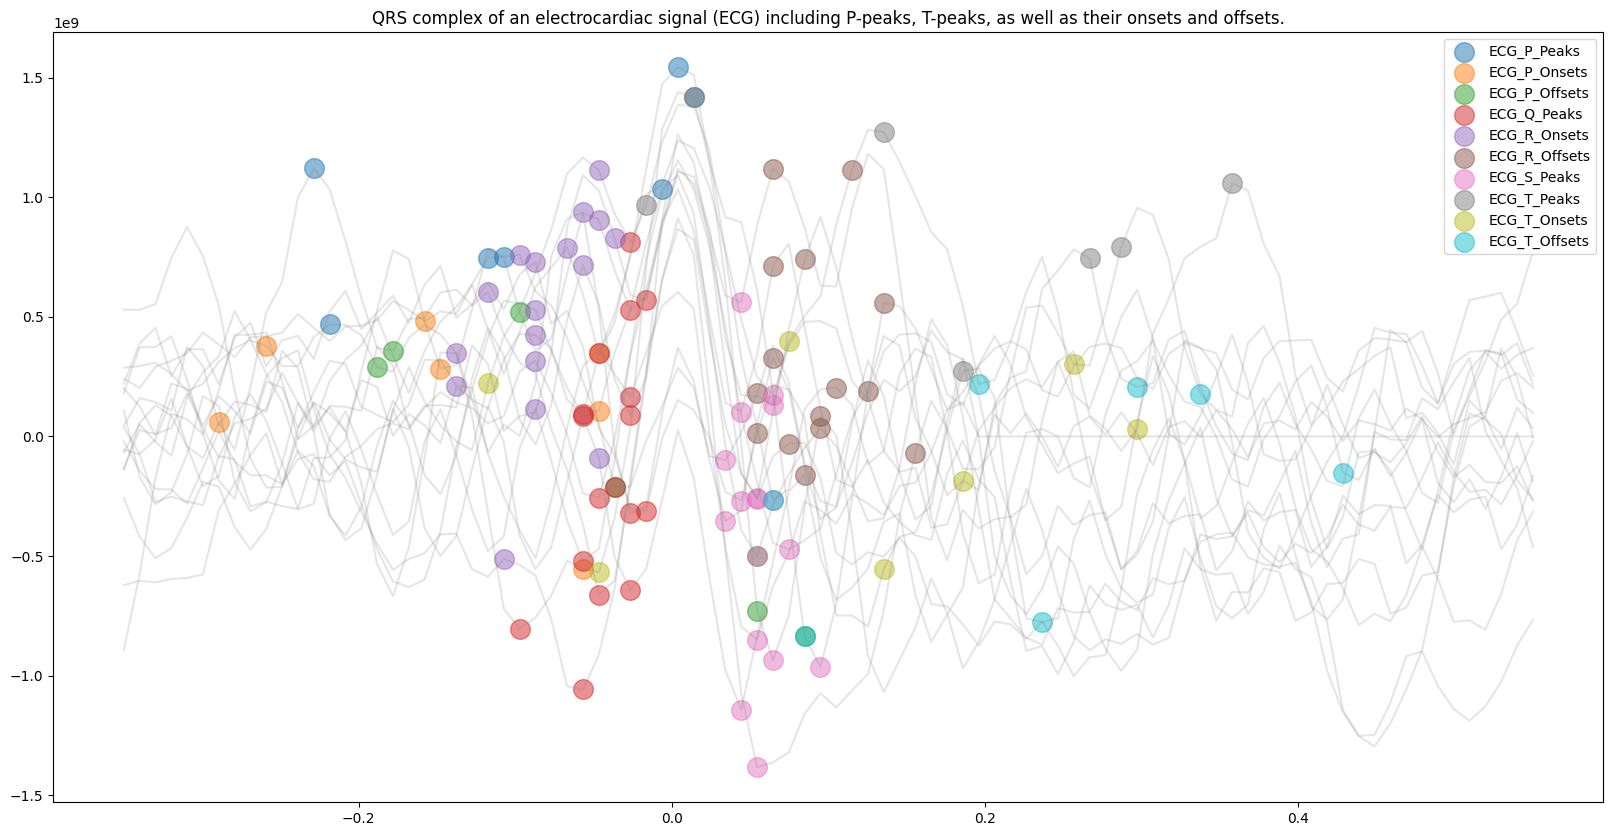

<Figure size 2000x1000 with 0 Axes>

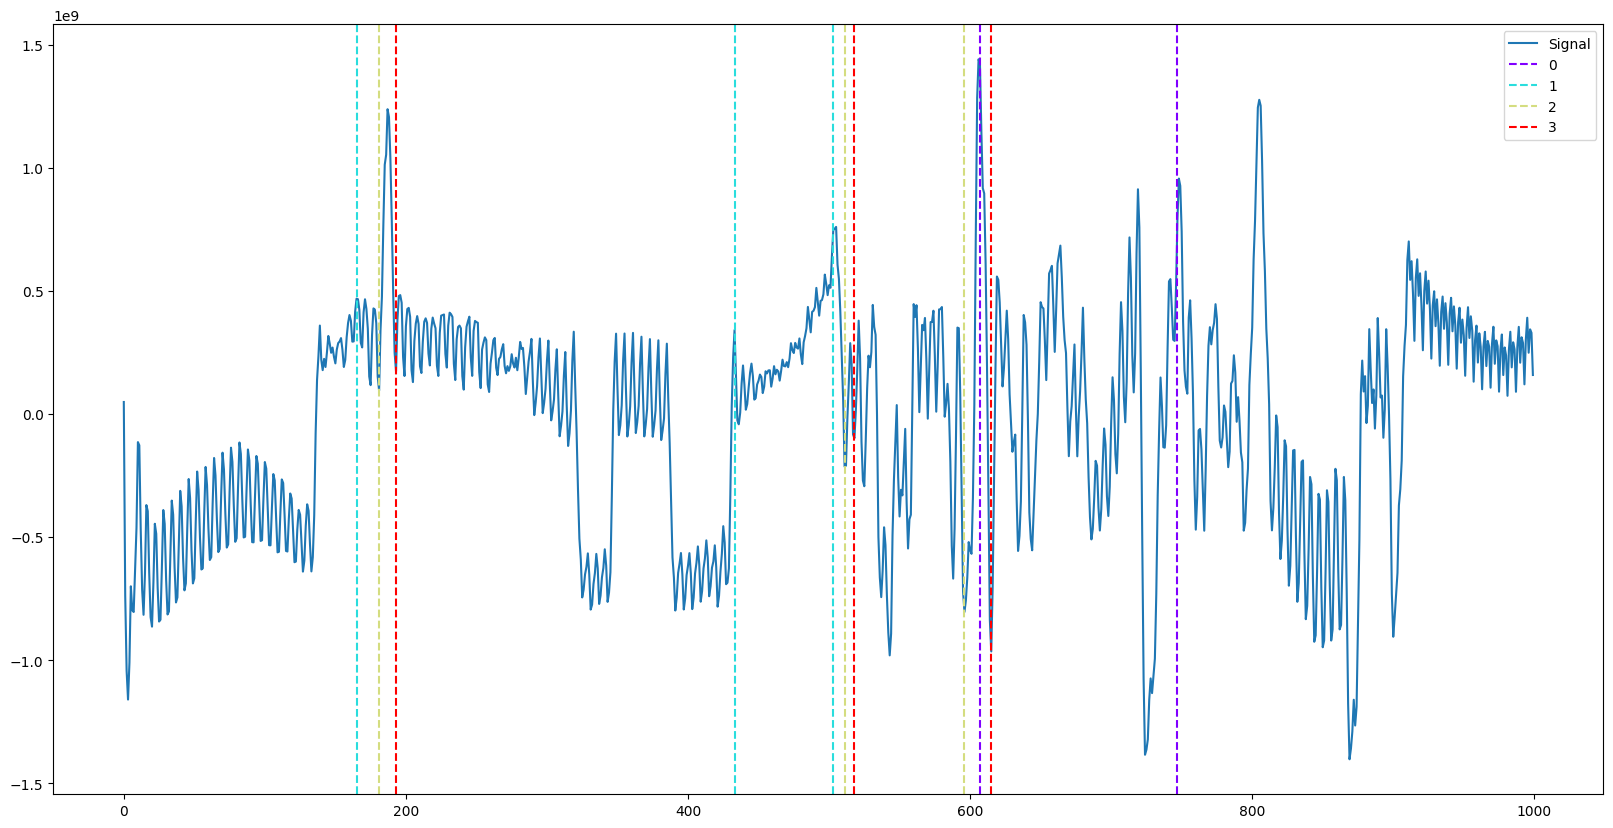

In [348]:
ecg_processing.detect_qrs_complex("dwt")

2 - QRS complex with cwt method

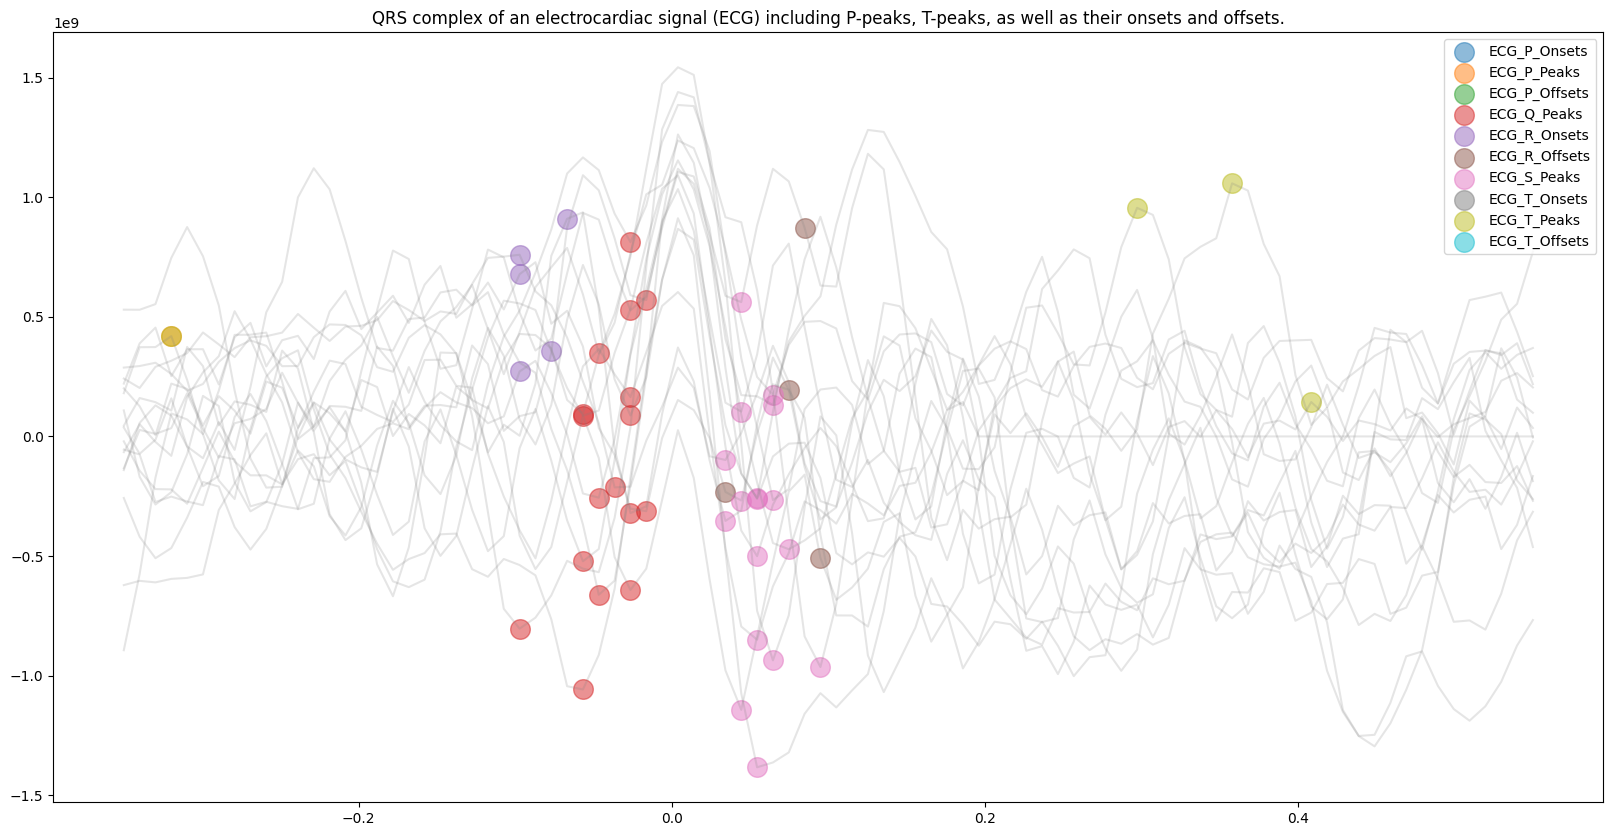

<Figure size 2000x1000 with 0 Axes>

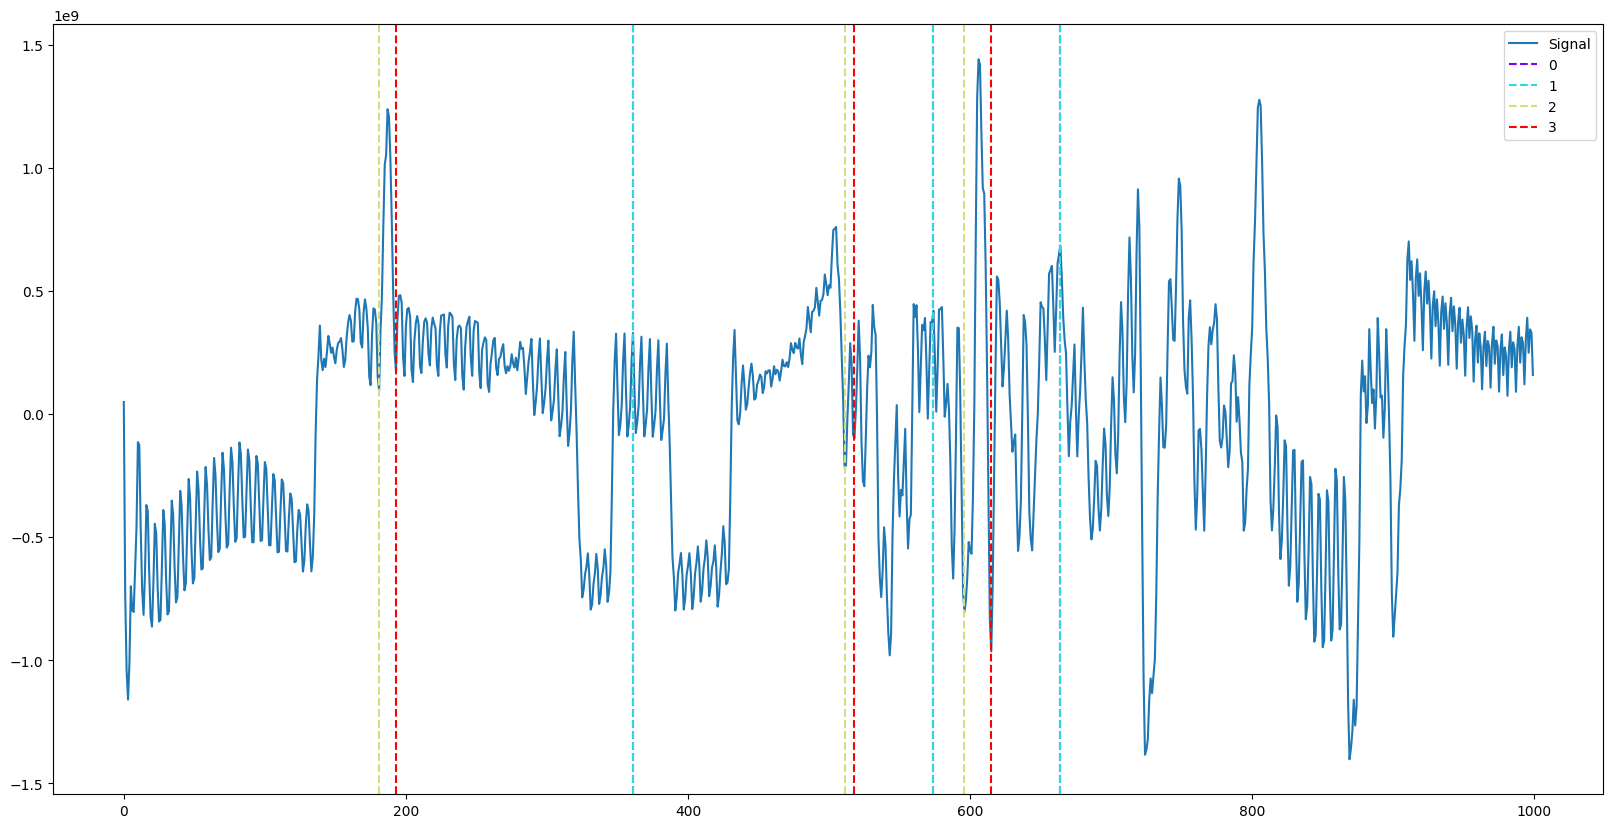

In [349]:
ecg_processing.detect_qrs_complex("cwt")

**3.2.3 PLOTING Heart Rate Variability (HRV)**

Peaks founded  {'ECG_R_Peaks': array([ 187,  355,  606,  853, 1071, 1279, 1483, 2074, 2392, 3249, 3427,
       4191, 4499, 5014, 5355, 5809]), 'sampling_rate': 300}


HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0      3748.0  2171.62283         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5    HRV_RMSSD     HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  3402.675418  3524.753596  ...    0.693147   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    3.906891     0.939454       NaN        NaN         NaN  1.225402   

   HRV_HFD   HRV_KFD   HRV_LZC  
0      NaN  2.635664  0.781378  

[1 rows x 80 columns]

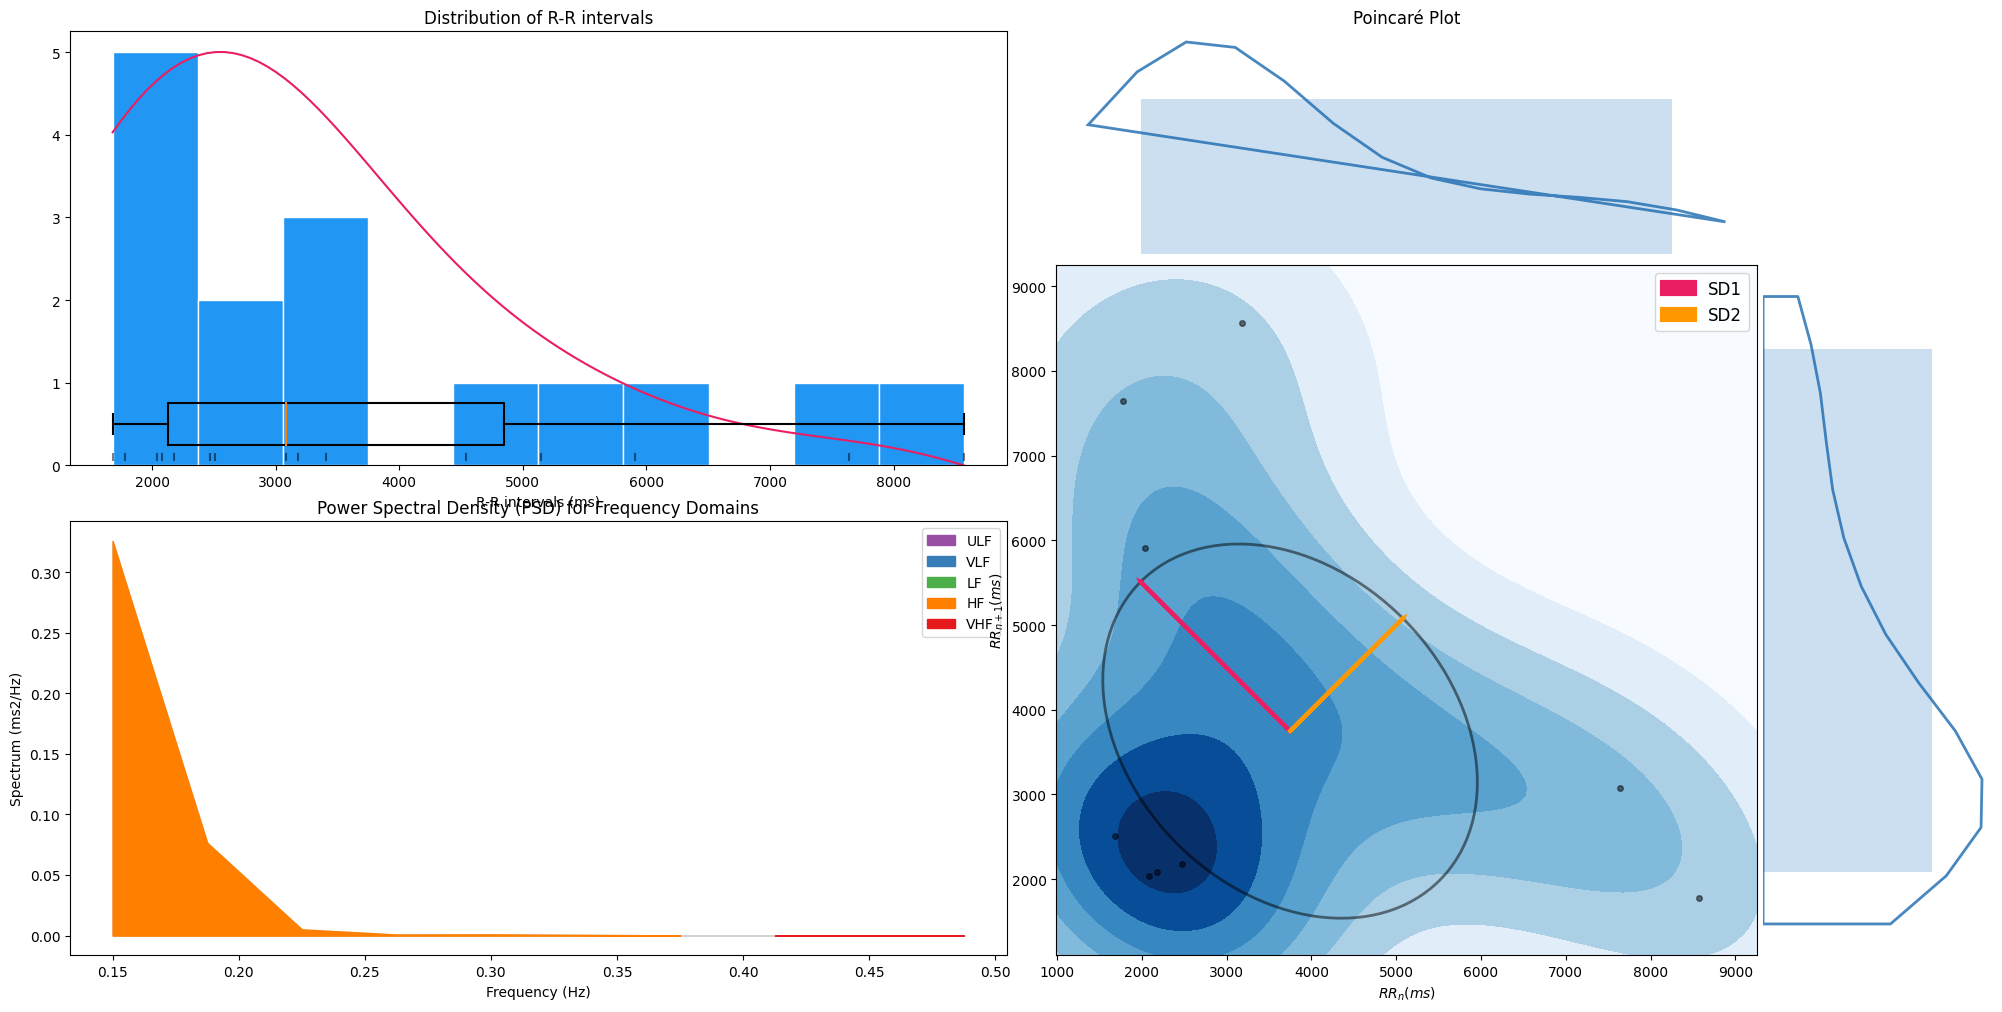

In [358]:
p, peaks = nk.ecg_peaks(cleaned_ecg, sampling_rate=300)
print('Peaks founded ',peaks)
# Plot HRV
nk.hrv(p, sampling_rate=100, show=True)

#### **FINAL STEP: PROPOSAL TO DETECT ECG ANOMALIES** 

**ML for detection**

One of my proposals to detect anomalies would be to use predictive models based on Machine Learning.

This proposal would be using the data of a final csv, like the one we have managed to have.

The prediction that would give us would be the class 'report'.

Below I leave a class with different models studied.

In [ ]:
#ML regression algorithms - Training stage
class Models(): 
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    
  def linearRegression(self, normalize): 
    lr_model = LinearRegression(fit_intercept= True,
                                normalize= normalize)
    lr_model.fit(self.X_train, self.y_train)
    return lr_model

  def logisticRegression(self, max_iter, penalty): 
    lr_model = LogisticRegression(max_iter = max_iter, 
                                  penalty = penalty)
    lr_model.fit(self.X_train, self.y_train)
    return lr_model

  def decisionTreeReg(self, criterion, max_depth, min_samples_leaf, min_samples_split): 
    tree_model = DecisionTreeRegressor(criterion = criterion, 
                                        max_depth = max_depth, 
                                        min_samples_leaf = min_samples_leaf, 
                                        min_samples_split = min_samples_split)
    tree_model.fit(self.X_train, self.y_train)
    return tree_model

  #ENSEMBLES
  def RandomForestRegressor(self, n_estimators, criterion, max_depth, max_features, min_samples_split, min_samples_leaf): 
      rf_model = RandomForestRegressor(
          n_estimators = n_estimators,
          criterion = criterion, 
          max_depth = max_depth,
          max_features = max_features,
          min_samples_split = min_samples_split,
          min_samples_leaf = min_samples_leaf)
      rf_model.fit(self.X_train, self.y_train)
      return rf_model

  def AdaBoost(self, n_estimators, learning_rate, loss):
      ab_model = AdaBoostRegressor(
          n_estimators = n_estimators,
          learning_rate = learning_rate,
          loss = loss)
      ab_model.fit(self.X_train, self.y_train)
      return ab_model

The idea would be to make a study of the different models with our data and different optimizations to determine which one best fits our data and makes the best predictions.

**DL for detection**

*In this part I have not implemented any example class since neural networks are always more complex to program, so I will rely on something more theoretical.*
Since neural networks are computationally very expensive, what we would mainly do is to develop an algorithm that classifies ECGs as valid or invalid. Once we have a dataset with all the valid ECGs, the training phase of the different networks would begin.

The final step would be, for example, once we have our network trained and validated, to apply this first step as something integrated for real applications since if an ECG is invalid, the network would not know how to interpret it correctly

*Remember that this is a theoretical proposal*

Proposal 1: 

Based on literature and different papers, it would be interesting to make use of a DNN or rather a residual neural network for signal recognition to facilitate the formation of networks that are substantially deeper.

In addition, Deep Neural Networks (DNNs) are models composed of stacked transformations that learn tasks by examples.

Cite: 	arXiv:1512.03385 [cs.CV] 
https://doi.org/10.48550/arXiv.1512.03385

Proposal 2:

Another proposal would be to perform this classification using Evolutionary Artificial Neural Networks (ANN) based on the joint evolution of topology and connection weights together with a novel similarity-based crossover.


